<img src="ML_Supervised_Header.png">

<font size="6"><b>DataScience Portfolio</b></font>   
<font size="4"><b>Enrique Otero Espinosa</b></font>   
<font size="4"><b>https://github.com/eoroot1974/DataSciencePortfolio</b></font>

<font size="4"><b>Machine Learning Supervised Algorithms</b></font>   
<font size="4">Binary Classification with Traditional ML Algorithms</font>

<font size="4">Project Name:</font>    
<span style='color:DarkBlue'>Project_CTB-LoanApprovalPrediction</span>   
<font size="4">Project Location:</font>    
<a href="https://github.com/eoroot1974/DataSciencePortfolio/tree/main/MachineLearning/SupervisedLearning/ClassificationTraditionalMLBinary/Project_CTB-LoanApprovalPrediction" style="color:DarkBlue">Binary Classification with Traditional ML Algorithms: Loan Approval Prediction</a>   
<font size="4">Date:</font>    
<span style='color:DarkBlue'>November 20th, 2024</span> 

***
<span style='color:DarkBlue'><font size="4"><strong>TABLE OF CONTENTS</strong></font></span>   

[Overview](#0-Overview)   
[1. Libraries](#1-LoadLib)   
[2. Data Loading and Data Description](#2-DataLD)  
[3. Exploratory Data Analysis (EDA)](#3-EDA)  
&nbsp;&nbsp;[3.1. Dataset Structure and Data types](#31-DataStructureandTypes)  
&nbsp;&nbsp;[3.2. Basic statistical information](#32-BasicStatInfo)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.2.1. Statistical Basic Summary](#321-StatisticalSummary)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.2.2. Outlier Analysis](#322-OutlierAnalysis)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.2.1. Initial Outlier Detection](#3221-OutlierDetect)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.2.2 Outlier Handling Methods](#3222-OutlierHandling)  
&nbsp;&nbsp;[3.3. Graphical dataset analysis](#33-GraphAnalysis)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.3.1. Variables Graphical analysis - Univariate](#331-GraphAnalysisVariableU)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.3.2. Variables Graphical analysis - Multivariate](#332-GraphAnalysisVariableM)   
&nbsp;&nbsp;[3.4. Correlation Analysis](#34-Corr)  
&nbsp;&nbsp;[3.5. Model Suitability Statistical Tests](#35-ModelTests)  
[4. Model Training](#4-Train)  
[5. Model Predictions](#5-Pred)  
[6. Model Results and Evaluation](#6-Results)  
***

In [1]:
%%html
<style>
table {float:left}
</style>

# Overview <a class="anchor" id="0-Overview"></a>

## Loan Approval Prediction: End-to-End Classification Analysis

This project presents a complete machine learning workflow aimed at predicting loan approval status (i.e., whether a borrower will default) using the CTB Loan Approval dataset. The dataset includes diverse demographic, financial, and loan-related attributes for thousands of individuals. The objective is to build a high-performing classification model that can be used in real-world loan evaluation scenarios, such as in banking or fintech applications.

### Project Features

Data Preprocessing and Cleaning: The initial data was assessed for missing values, outliers, inconsistent categories, and imbalance in the target variable. Three versions of the dataset were created for experimentation:
- Raw: Original cleaned dataset (`loan_data`)
- Winsorized: Outliers capped using statistical thresholds (`loan_data_w`)
- IQR-filtered: Extreme values removed based on the Interquartile Range (`loan_data_r`)

Class Imbalance Handling with SMOTE: Each of the above datasets was balanced using SMOTE (Synthetic Minority Over-sampling Technique), yielding three additional datasets: `loan_data_B`, `loan_data_w_B`, and `loan_data_r_B`. Further, these six were scaled using standardization, resulting in a total of nine datasets for training.

Exploratory Data Analysis (EDA): EDA was used to understand data structure and prepare for modeling. This included:
- Target imbalance visualization and correction
- Correlation matrix and multicollinearity analysis (VIF)
- Linearity of the logit for logistic regression
- Feature distribution and outlier treatment
- Point-biserial correlation to measure numeric predictors’ association with the target

Model Training and Evaluation: Eight machine learning models were trained across all nine dataset versions:
- Random Forest, Gradient Boosting, Decision Tree, SVM, KNN, Naive Bayes, AdaBoost, and Ridge Classifier

Model Selection: Accuracy scores were compared using a heatmap. The best performance was achieved with the Random Forest classifier trained on the IQR-filtered, SMOTE-balanced, and standardized dataset (`loan_data_r_B_scaled`).

Performance Analysis: The selected model was further evaluated using:
- Confusion matrix with True Positives, False Positives, etc.
- Precision, Recall, F1-score
- ROC Curve and AUC score
- Feature importance ranking to identify key predictive attributes

Kaggle Submission: The trained model was applied to an external test set (`loan_approval_prediction_test.csv`) provided by a Kaggle competition. The test data underwent the same transformation steps (IQR filtering, one-hot encoding, and standardization) to ensure consistency. Predictions were submitted using the required format.

### Purpose

The goal of this project is to develop a generalizable loan approval prediction model by integrating sound data preprocessing techniques, systematic modeling evaluation, and rigorous validation to avoid overfitting and data leakage.

### Usage

Data Preparation: Process and balance raw data using outlier detection and SMOTE  
Model Selection: Train multiple classifiers on different versions of the dataset  
Evaluation: Compare results and perform in-depth analysis of the best model  
Deployment: Apply the final model to unseen test data for real-world prediction or competition submission

### Requirements

Python 3.x  
NumPy  
Pandas  
Matplotlib  
Seaborn  
scikit-learn  
imblearn  
statsmodels

### Conclusion

This project demonstrates a full lifecycle of supervised classification for credit risk assessment. By combining preprocessing strategies, SMOTE balancing, and comparative model evaluation, the final solution achieves high predictive performance and is aligned with practical financial modeling needs.


# 1. Libraries <a class="anchor" id="1-LoadLib"></a>

In [2]:
# Data manipulation and numerical operations
import os # For OS data files and names manipulation
import numpy as np  # For numerical calculations and generating synthetic data
import pandas as pd  # For handling and manipulating data in tabular format

# Visualization libraries
import matplotlib.pyplot as plt  # For creating data visualizations
import seaborn as sns  # For enhanced data visualizations, like correlation plots

from scipy.stats.mstats import winsorize

from imblearn.over_sampling import SMOTE
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import StandardScaler
from scipy.stats import pointbiserialr

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# To ignore warnings (optional)
import warnings  
warnings.filterwarnings('ignore')  # To suppress warnings for cleaner output


# 2. Data Loading and Data Description <a class="anchor" id="2-DataLD"></a>

In [3]:
# Load the dataset from the CSV file
data_path = '/home/dsninja/Documents/Shared/WorkArea/Anaconda/JupiterProjects/Project_CTB-LoanApprovalPrediction/data'
date_file_name = 'loan_approval_prediction_train.csv'

full_file_path = os.path.join(data_path, date_file_name)
loan_data_train = pd.read_csv(full_file_path)

# Display the first few rows to inspect the data
loan_data_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


<font size="4"><b>Explanation of the Dataset columns</b></font>   

| Variable Name                   | Variable Description                                     | Variable Type        | Unit   | CL type     |
|:--------------------------------|:---------------------------------------------------------|:---------------------|--------|------------:|
| __id__                          | Unique identifier for each record in the dataset.        | Integer              | None   | Independent |
| __person_age__                  | Age of the individual applying for the loan.             | Numeric (integer)    | years  | Independent |
| __person_income__               | Annual income of the individual in dollars.              | Numeric (integer)    | USD    | Independent |
| __person_home_ownership__       | Type of home ownership status of the individual          | Categorical (string) | None   | Independent |
| __person_emp_length__           | Length of employment of the individual in years.         | Numeric (float)      | years  | Independent |
| __loan_intent__                 | The purpose for which the loan is being requested.       | Categorical (string) | None   | Independent |
| __loan_grade__                  | Grade assigned to the loan by the lending system.        | Categorical (string) | None   | Independent |
| __loan_amnt__                   | The amount of money requested for the loan.              | Numeric (integer)    | USD    | Independent |
| __loan_int_rate__               | Interest rate assigned to the loan, in percentage.       | Numeric (float)      | %      | Independent |
| __loan_percent_income__         | Ratio of loan amount to annual income, in percentage.    | Numeric (float)      | %      | Independent |
| __cb_person_default_on_file__   | Whether the individual has a history of default recorded.| Categorical (string) | None   | Independent |
| __cb_person_cred_hist_lengthd__ | Length of the individual's credit history, in years.     | Numeric (integer)    | years  | Independent |
| __loan_status__                 | Target variable indicating the loan's outcome: defaulted (1) or not (0).     | Categorical (binary) | None   | ___Dependent___ |

# 3. Exploratory Data analysis (EDA) <a class="anchor" id="3-EDA"></a>

## 3.1. Dataset Structure and Data types <a class="anchor" id="31-DataStructureandTypes"></a>

In [4]:
# Display the shape (dimensions) of the dataset
print("Dataset shape:", loan_data_train.shape)

# Display the data types of each column
print("\nData types:\n", loan_data_train.dtypes)

Dataset shape: (58645, 13)

Data types:
 id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object


The following information can be extracted:   
__Dataset Shape: (58645, 13)__ The dataset has 58,645 rows and 13 columns. Each row represents a single observation of an individual's loan application details. The first 12 columns contain features describing the individual, their loan, and their credit history. The 13th column, _loan_status_, is the target variable, with the loan's outcome: __defaulted__ (1) or __not defaulted__ (0).

__Data Types:__   
<span style='color:DarkBlue'>id:</span> __int64__. This column contains unique identifiers for each observation, stored as integers.   
<span style='color:DarkBlue'>person_age:</span> __int64__. The age of the individual, stored as integers, representing whole numbers.   
<span style='color:DarkBlue'>person_income:</span> __int64__. The individual's annual income, represented as integers in dollars.   
<span style='color:DarkBlue'>person_home_ownership:</span> __object__. This column indicates the individual's homeownership status, stored as categorical text values (e.g., 'rent,' 'own').   
<span style='color:DarkBlue'>person_emp_length:</span> __float64__. Length of employment in years, stored as a floating-point number to allow for fractional years.   
<span style='color:DarkBlue'>loan_intent:</span> __object__. The purpose for the loan, stored as categorical text values (e.g., 'education,' 'medical').   
<span style='color:DarkBlue'>loan_grade:</span> __object__. The credit grade assigned to the loan, represented as categorical text values (e.g., 'A,' 'B').   
<span style='color:DarkBlue'>loan_amnt:</span> __int64__. The loan amount requested by the individual, stored as integers.   
<span style='color:DarkBlue'>loan_int_rate:</span> __float64__. The interest rate for the loan, stored as a floating-point number for precision (e.g., 12.34%).   
<span style='color:DarkBlue'>loan_percent_incom:</span> __float64__. The ratio of the loan amount to the individual's annual income, expressed as a percentage and stored as a floating-point number.   
<span style='color:DarkBlue'>cb_person_default_on_file:</span> __object__. Indicates whether the individual has a history of default recorded in their credit bureau file, stored as categorical text values ('Y' for Yes, 'N' for No).   
<span style='color:DarkBlue'>cb_person_cred_hist_length:</span> __int64__. The length of the individual's credit history in years, stored as integers.    

<span style='color:DarkRed'>loan_status:</span> __int64__. The target variable indicating the loan's outcome: 0 for loans not defaulted and 1 for defaulted, stored as integers.   

As the target variable <span style='color:DarkRed'>loan_status</span> is cathegorical binary, we can convert it to this type using the following code. This conversion is particularly useful when preparing data for tasks like classification, where the target column represents discrete categories.

In [5]:
loan_data_train['loan_status'] = loan_data_train['loan_status'].astype('category')
loan_data_train['loan_status'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

<font size="4"><b>Null or NaN values in Dataset</b></font>   
You can check for null or NaN values in your dataset using the isnull() and sum() functions from pandas. Here’s the code to find if there are any null or NaN values in your dataset:

In [6]:
# Check for null or NaN values in the dataset
null_values = loan_data_train.isnull().sum()

# Display the result
print("Null or NaN values in the dataset:\n", null_values)

Null or NaN values in the dataset:
 id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


No Null or Nan values are found in the dataset.

## 3.2. Basic statistical information <a class="anchor" id="32-BasicStatInfo"></a>

### 3.2.1. Statistical Basic Summary <a class="anchor" id="321-StatisticalSummary"></a>

In [7]:
# Get basic statistical information about the dataset
statistical_summary = loan_data_train.describe()

# Display the result
statistical_summary.style.set_caption("Statistical Summary")

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,64046.172871,4.701015,9217.556518,10.677874,0.159238,5.813556
std,16929.497605,6.033216,37931.106978,3.959784,5563.807384,3.034697,0.091692,4.029196
min,0.000000,20.000000,4200.000000,0.000000,500.000000,5.420000,0.000000,2.000000
25%,14661.000000,23.000000,42000.000000,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,29322.000000,26.000000,58000.000000,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,43983.000000,30.000000,75600.000000,7.000000,12000.000000,12.990000,0.210000,8.000000
max,58644.000000,123.000000,1900000.000000,123.000000,35000.000000,23.220000,0.830000,30.000000


This statistical summary shows that the dataset contains 58,645 observations.

- The average age of individuals is __27.55__ years, with a standard deviation of 6.03 years, ranging from __20__ to __123__ years.
- The average annual income is __64,046__, with a standard deviation of 37,931, ranging from __4,200__ to __1,900,000__.
- The employment length averages __4.7__ years, with a standard deviation of 3.96 years, ranging from __0__ to __123__ years.
- The loan amount varies widely, with a mean of 9,217, a standard deviation of 5,563, and a range from __500__ to __35,000__.
- The interest rate on loans has a mean of __10.68%__, a standard deviation of 3.03%, and ranges from __5.42%__ to __23.22%__.
- The loan percent income, representing the proportion of income allocated to loan payments, has a mean of __0.159__ (15.9%), with a standard deviation of 0.092 (9.2%), ranging from __0__ to __0.83__ (83%).
- The credit history length averages __5.81__ years, with a standard deviation of 4.03 years, ranging from __2__ to __30__ years.

The 25th percentile (Q1), 50th percentile (median or Q2), and 75th percentile (Q3) for most variables are relatively evenly spaced, indicating a mostly balanced distribution. However, some variables, such as income and loan amounts, exhibit a large range, suggesting possible skewness due to high-income or high-loan outliers.

### 3.2.2. Outlier Analysis <a class="anchor" id="322-OutlierAnalysis"></a>
#### 3.2.2.1. Initial Outlier Detection <a class="anchor" id="3221-OutlierDetect"></a>
 
Detecting outliers before training binary classification models is essential because they can skew decision boundaries, introduce bias, and negatively impact model generalization. Outliers may lead to misclassification, reducing overall model performance and interpretability. They can also distort the class balance, affecting metrics like precision, recall, and AUC-ROC. Addressing outliers ensures a more robust, reliable, and fair classification model, leading to better predictions and actionable insights.     
To detect outliers, one common method is to use the Z-score or IQR (Interquartile Range) methods. Below is the code for detecting outliers using both techniques.

* __Using Z-score:__
The Z-score method calculates how far a data point is from the mean in terms of standard deviations. A common threshold is a Z-score of ±3.

* __Using IQR:__
The IQR method considers points outside the range of 1.5 times the IQR (difference between the 75th and 25th percentiles) as outliers.

In [8]:
# Function to detect outliers for all numeric features in a DataFrame
def detect_outliers_summary(df, numeric_columns, z_threshold=3):
    summary = {}

    # Dictionary to store unique IDs for outliers across all features
    unique_outliers = set()

    for col in numeric_columns:
        # Z-score method
        z_scores = np.abs(stats.zscore(df[col]))
        z_outliers = df.loc[z_scores > z_threshold, 'id']
        z_outlier_count = z_outliers.shape[0]
        
        # IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        iqr_outliers = df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), 'id']
        iqr_outlier_count = iqr_outliers.shape[0]
        
        # Update summary with counts
        summary[col] = {
            "z_outliers_count": z_outlier_count,
            "iqr_outliers_count": iqr_outlier_count,
        }

        # Update the unique outliers set
        unique_outliers.update(z_outliers)
        unique_outliers.update(iqr_outliers)

    # Add total unique records with outliers
    summary['unique_outliers_count'] = len(unique_outliers)

    return summary

# Example usage
numeric_columns = loan_data_train.select_dtypes(include=[np.number]).columns.difference(['id'])
outliers_summary = detect_outliers_summary(loan_data_train, numeric_columns)

# Print outliers summary
for feature, stats in outliers_summary.items():
    if feature != 'unique_outliers_count':
        print(f"Feature: {feature}")
        print(f"  Z-Score Outliers Count: {stats['z_outliers_count']}")
        print(f"  IQR Outliers Count: {stats['iqr_outliers_count']}")
    else:
        print(f"\nTotal Unique Records with Outliers across Features: {stats}")


Feature: cb_person_cred_hist_length
  Z-Score Outliers Count: 492
  IQR Outliers Count: 1993
Feature: loan_amnt
  Z-Score Outliers Count: 345
  IQR Outliers Count: 2045
Feature: loan_int_rate
  Z-Score Outliers Count: 66
  IQR Outliers Count: 34
Feature: loan_percent_income
  Z-Score Outliers Count: 459
  IQR Outliers Count: 1210
Feature: person_age
  Z-Score Outliers Count: 1010
  IQR Outliers Count: 2446
Feature: person_emp_length
  Z-Score Outliers Count: 627
  IQR Outliers Count: 1274
Feature: person_income
  Z-Score Outliers Count: 533
  IQR Outliers Count: 2411

Total Unique Records with Outliers across Features: 8782


There are several outliers in the data set:   
- For features like ___loan_amnt___, ___person_income___, and ___cb_person_cred_hist_length___, IQR finds many more outliers than Z-score, indicating skewness or long-tailed distributions.   
- For ___loan_int_rate___, both methods identify a small number of outliers, suggesting a more normal distribution.   
- For ___person_age___ and ___person_income___, IQR shows a much higher count, likely due to extreme values (e.g., individuals over 100 years or extremely high incomes).

To visually explore these outliers we use boxplots and variable distribution graphs.   
___Boxplots___ are useful for visually identifying outliers by displaying the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum values, with outliers appearing as individual points beyond the whiskers. They help detect skewness, variability, and extreme values in a dataset, making it easier to decide on outlier treatment strategies. ___Distribution plots___ (histograms with KDE) provide a deeper insight into the overall shape of the data, showing whether the distribution is normal, skewed, or multimodal. Combining boxplots and distribution graphs allows for a comprehensive exploration of data anomalies, ensuring better preprocessing decisions before applying machine learning models.

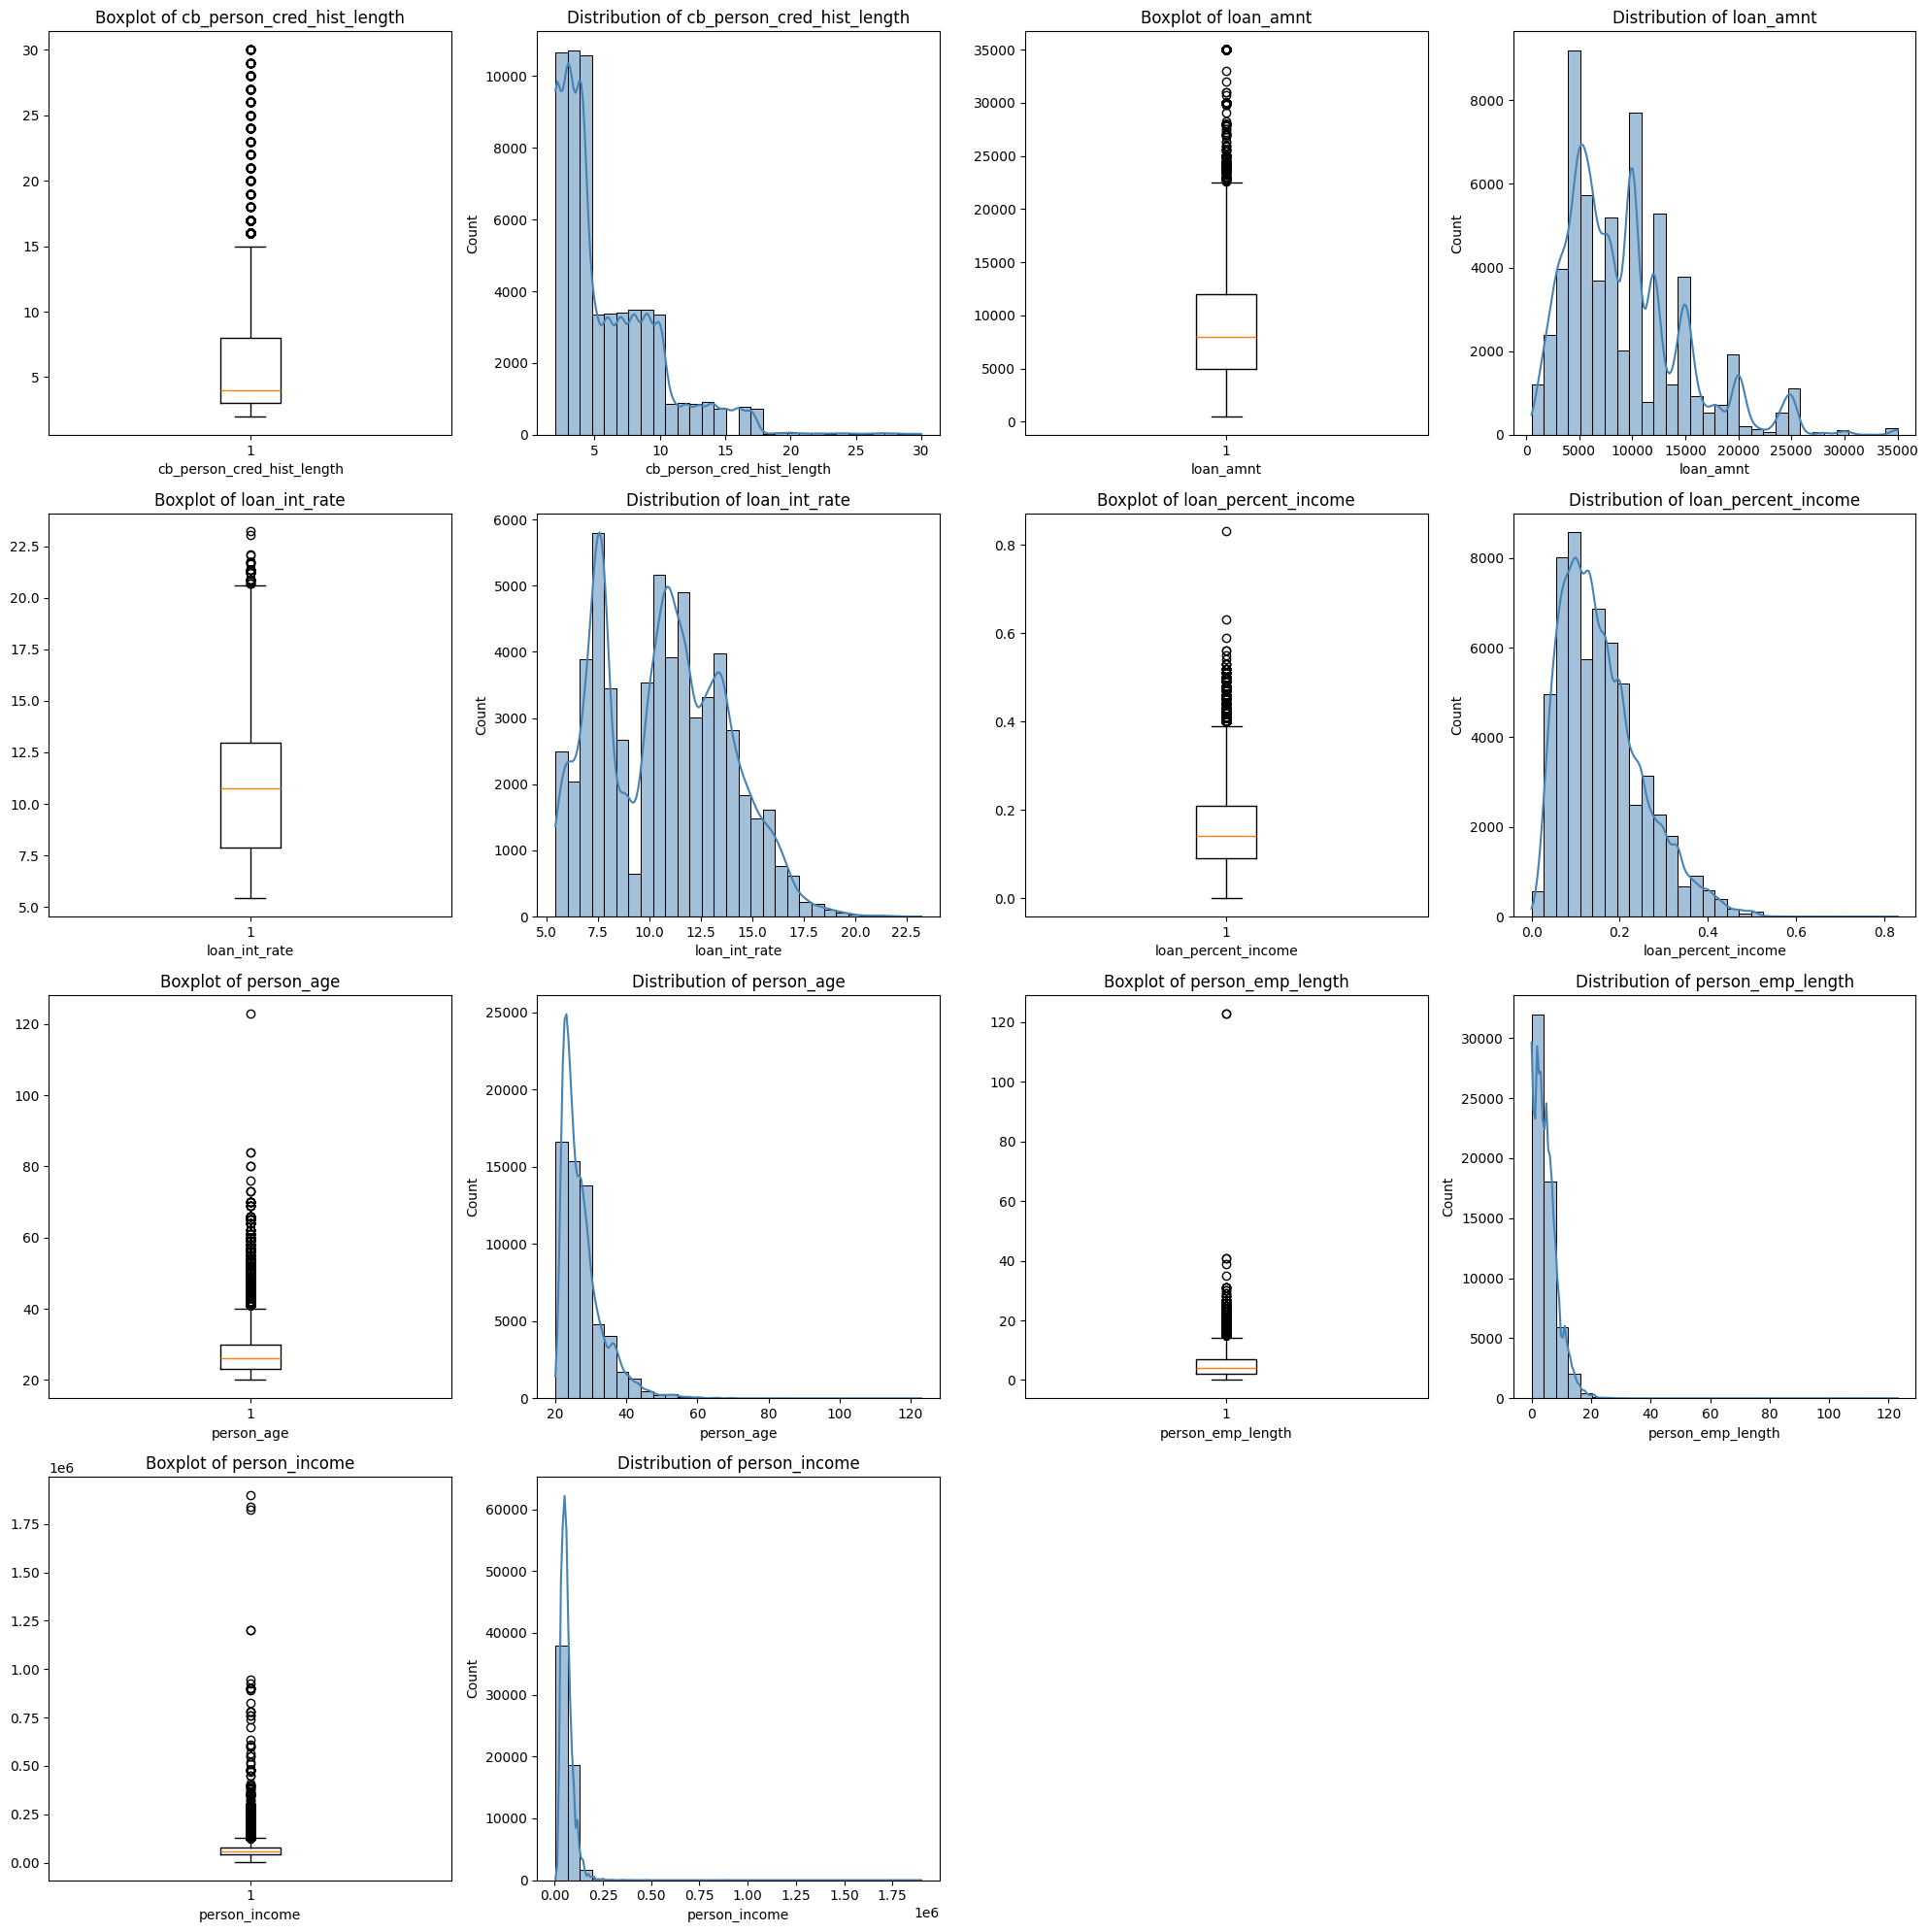

In [9]:
# Define figure size
plt.figure(figsize=(20, 20))  # Increase height to accommodate both boxplots and distributions

columns_per_row = 4  # Number of columns per row
rows = 2 * ((len(numeric_columns) + columns_per_row - 1) // columns_per_row)  # Adjust rows for two subplots per variable

for i, col in enumerate(numeric_columns):
    # Boxplot (Top)
    plt.subplot(rows, columns_per_row, 2 * i + 1)  
    plt.boxplot(loan_data_train[col].dropna(), vert=True)  # Drop NaN for boxplot calculation
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    # Distribution Plot (Bottom)
    plt.subplot(rows, columns_per_row, 2 * i + 2)  
    sns.histplot(loan_data_train[col].dropna(), bins=30, color='steelblue', edgecolor='black', kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


Key Observations:

- Presence of outliers: As we identified using Z-Score and IQR techniques, this graphic representation shows that many variables have significant outliers (visible in the boxplots).   
- Skewed Distributions:   
        Variables like ___person_income___ and ___loan_amnt___ have a long tail to the right, indicating positive skewness.   
        ___person_age___ has a concentration of values at lower ages, but a few extreme values (above 100) cause a long tail.
- Loan-related variables like ___loan_int_rate___ and ___loan_percent_income___ have relatively normal-looking distributions but still show some spread.

#### 3.2.2.2 Outlier Handling Methods <a class="anchor" id="3222-OutlierHandling"></a>

We will handle these outliers using two techniques that will generate 2 different data sets. We will use both in the classification models to also explore how this outliers removal techniques impact on results:

__Winsorization (dataset _loan_data_w_)__: We apply Winsorization to limit extreme values for all numerical features. We also perform capping on person_age and person_emp_length at 120 years to remove incorrect entries.

__IQR Method Removal (data set _loan_data_r_)__: Removall of all values outside Q1 - 1.5 × IQR and Q3 + 1.5 × IQR.

The details of each technique are:

<span style='color:DarkBlue'>Truncation (Winsorization):</span> This method caps extreme values at a specified percentile to retain data while reducing the impact of outliers.
Implementation Steps:   
    Choose a threshold, typically the 1st and 99th percentiles (or 5th and 95th, depending on the data).
    Cap values above the upper percentile to the upper bound and values below the lower percentile to the lower bound.
    Preserves most of the data while minimizing the influence of extreme values.   
✅ __Pros:__ Retains all observations, preserving dataset size. Reduces the impact of extreme outliers without full removal.   
❌ __Cons:__ Might still leave some residual skewness. Can hide genuine extreme variations in data.   

<span style='color:DarkBlue'>Outlier Removal (IQR Method):</span> This approach removes extreme values that fall outside the 1.5 × IQR range.
Implementation Steps: Compute Q1 (25th percentile) and Q3 (75th percentile) for each variable. Calculate $IQR = Q3 - Q1$. Define lower and upper bounds. Remove rows where values are outside this range.   
✅ __Pros:__ Eliminates extreme values, ensuring a cleaner dataset. Can improve model performance if outliers are erroneous or misleading.   
❌ __Cons:__ Reduces dataset size, which may be problematic for small datasets. May remove valuable rare observations.   

Code below perform the operations:

In [10]:
# Create copies of the dataset for each technique
loan_data_w = loan_data_train.copy()  # Winsorization method
loan_data_r = loan_data_train.copy()  # IQR-based outlier removal

### 1. WINSORIZATION METHOD (loan_data_w)
# Apply Winsorization to all numerical columns (1% lowest, 1% highest values capped)
for col in numeric_columns:
    loan_data_w[col] = winsorize(loan_data_w[col], limits=[0.01, 0.01])

# Remove incorrect `person_age` and `person_emp_length` values above 120 years
loan_data_w = loan_data_w[(loan_data_w["person_age"] <= 120) & (loan_data_w["person_emp_length"] <= 120)]

### 2. IQR METHOD REMOVAL (loan_data_r)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR-based outlier removal for each numeric column
for feature in numeric_columns:
    loan_data_r = remove_outliers_iqr(loan_data_r, feature)

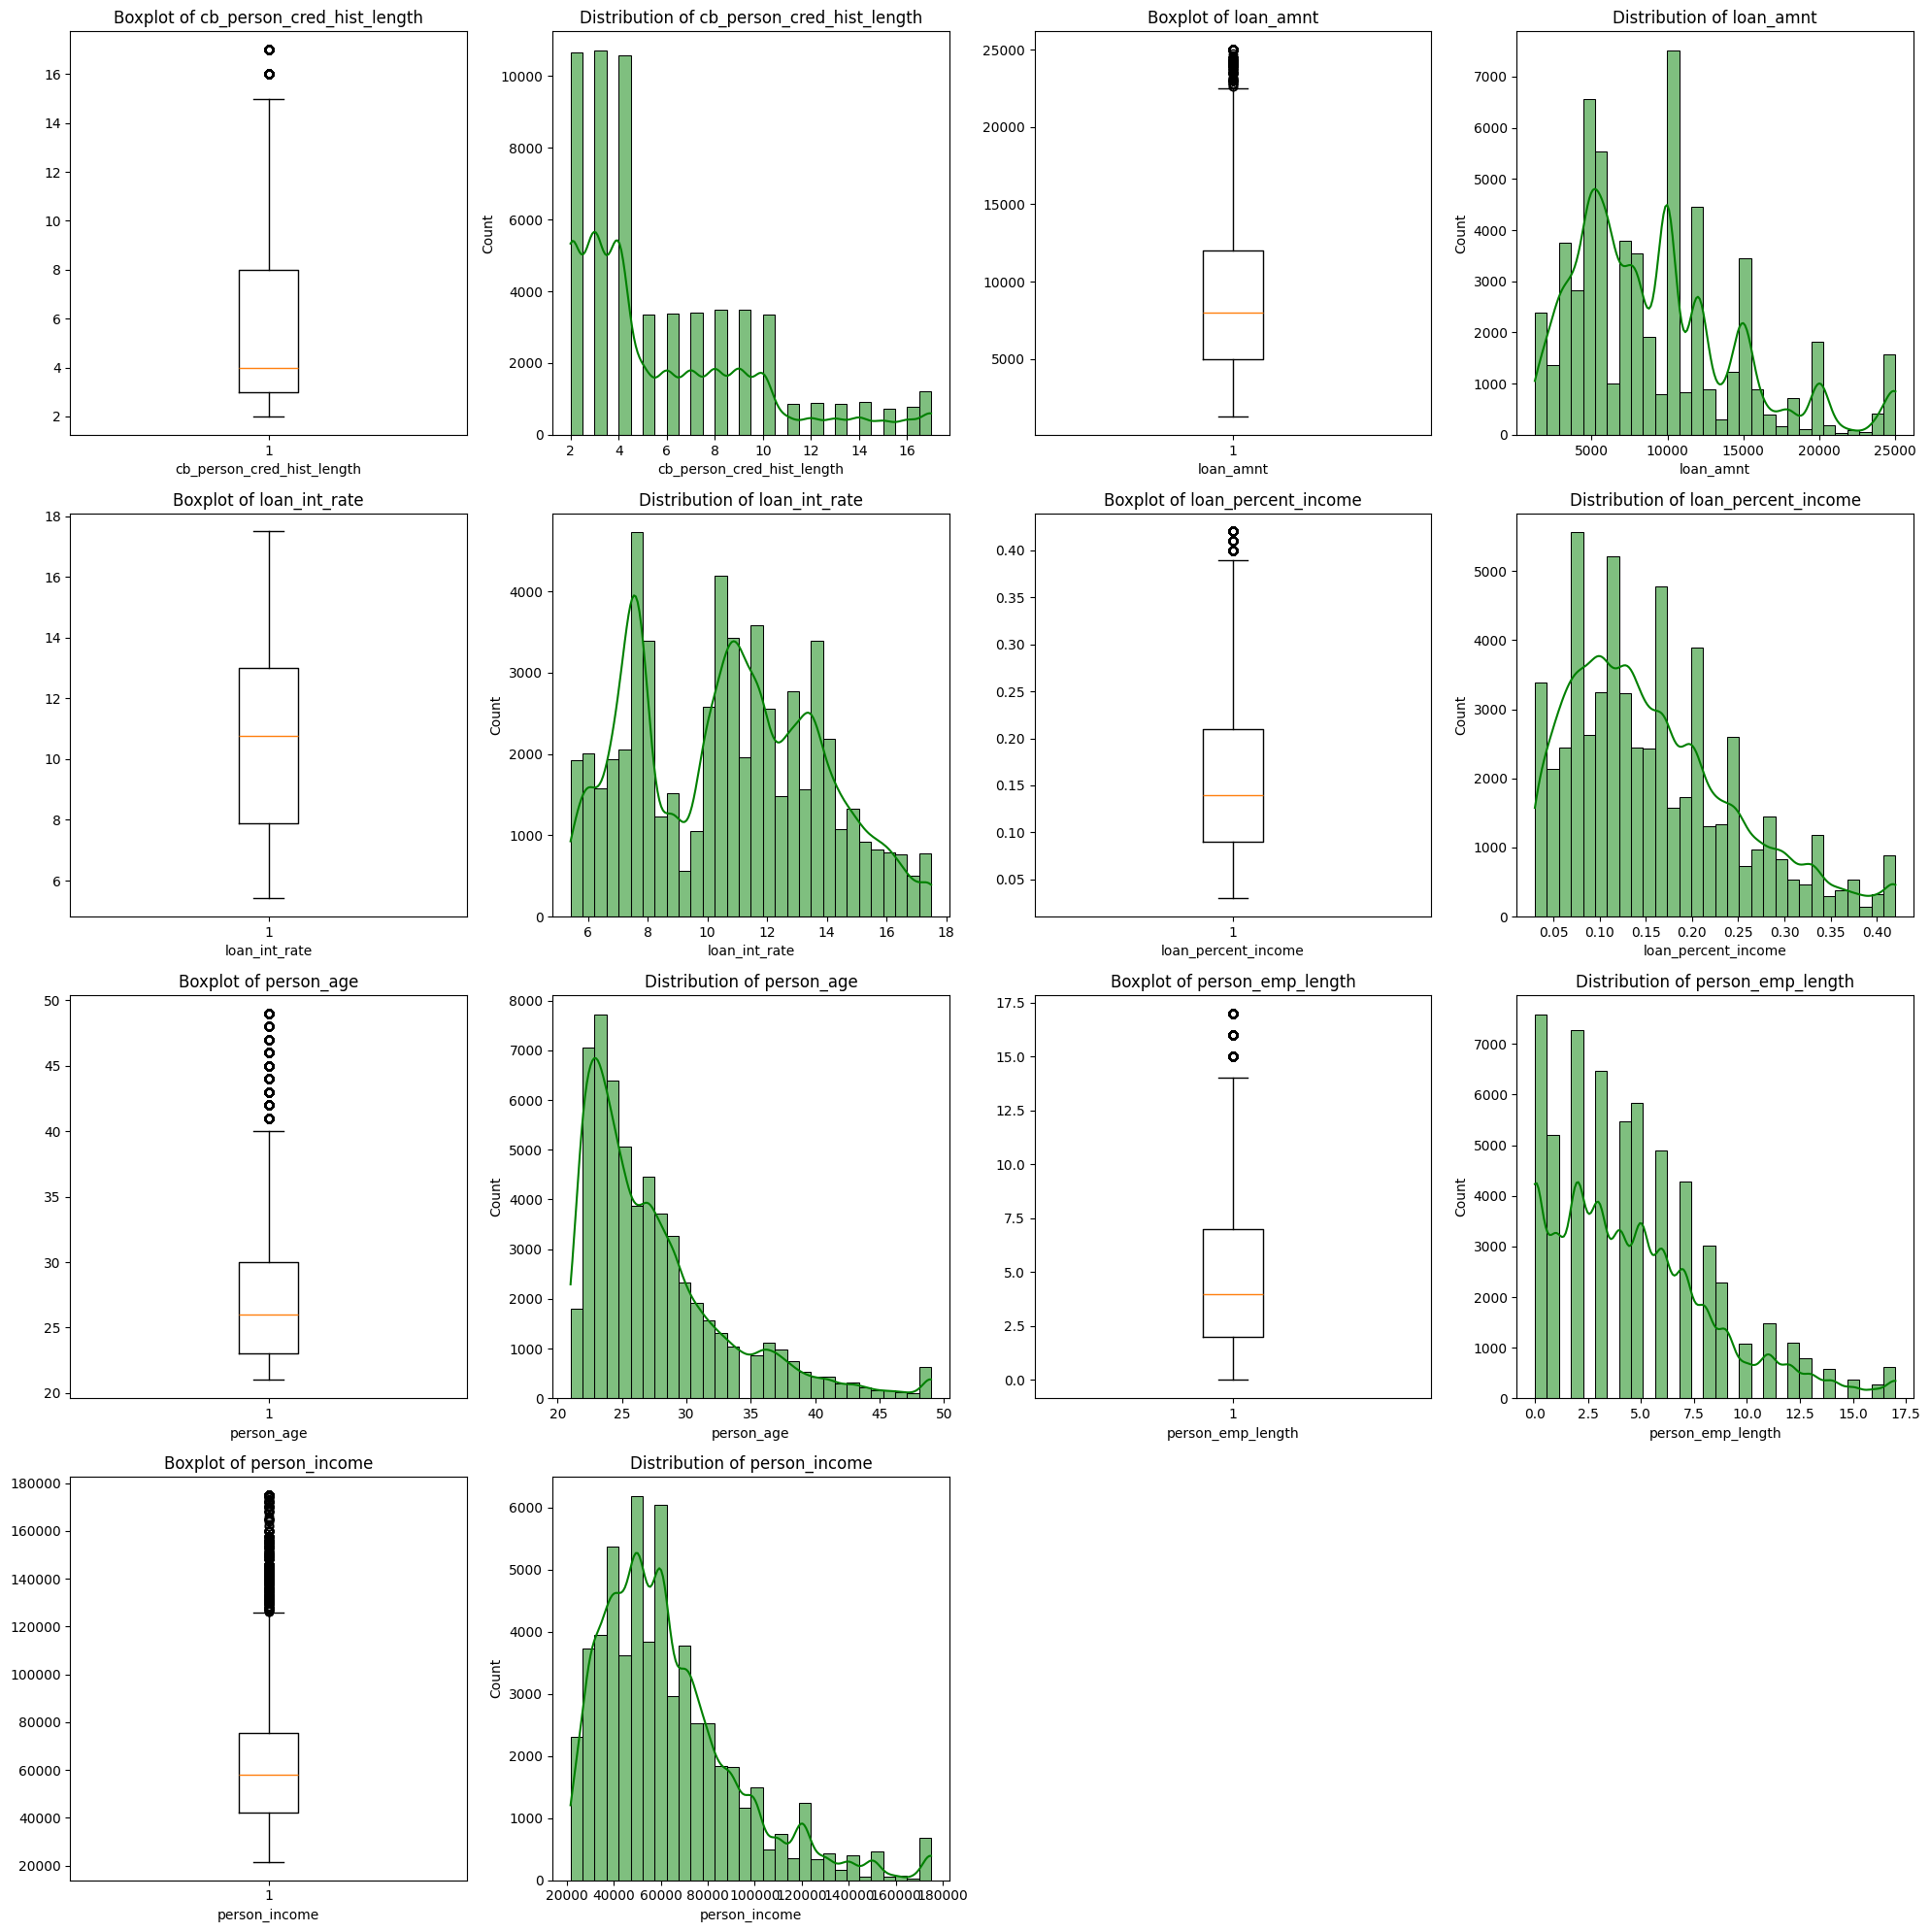

In [11]:
# Define figure size
plt.figure(figsize=(20, 20))  # Increase height to accommodate both boxplots and distributions

columns_per_row = 4  # Number of columns per row
rows = 2 * ((len(numeric_columns) + columns_per_row - 1) // columns_per_row)  # Adjust rows for two subplots per variable

for i, col in enumerate(numeric_columns):
    # Boxplot (Top)
    plt.subplot(rows, columns_per_row, 2 * i + 1)  
    plt.boxplot(loan_data_w[col].dropna(), vert=True)  # Drop NaN for boxplot calculation
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    # Distribution Plot (Bottom)
    plt.subplot(rows, columns_per_row, 2 * i + 2)  
    sns.histplot(loan_data_w[col].dropna(), bins=30, color='green', edgecolor='black', kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

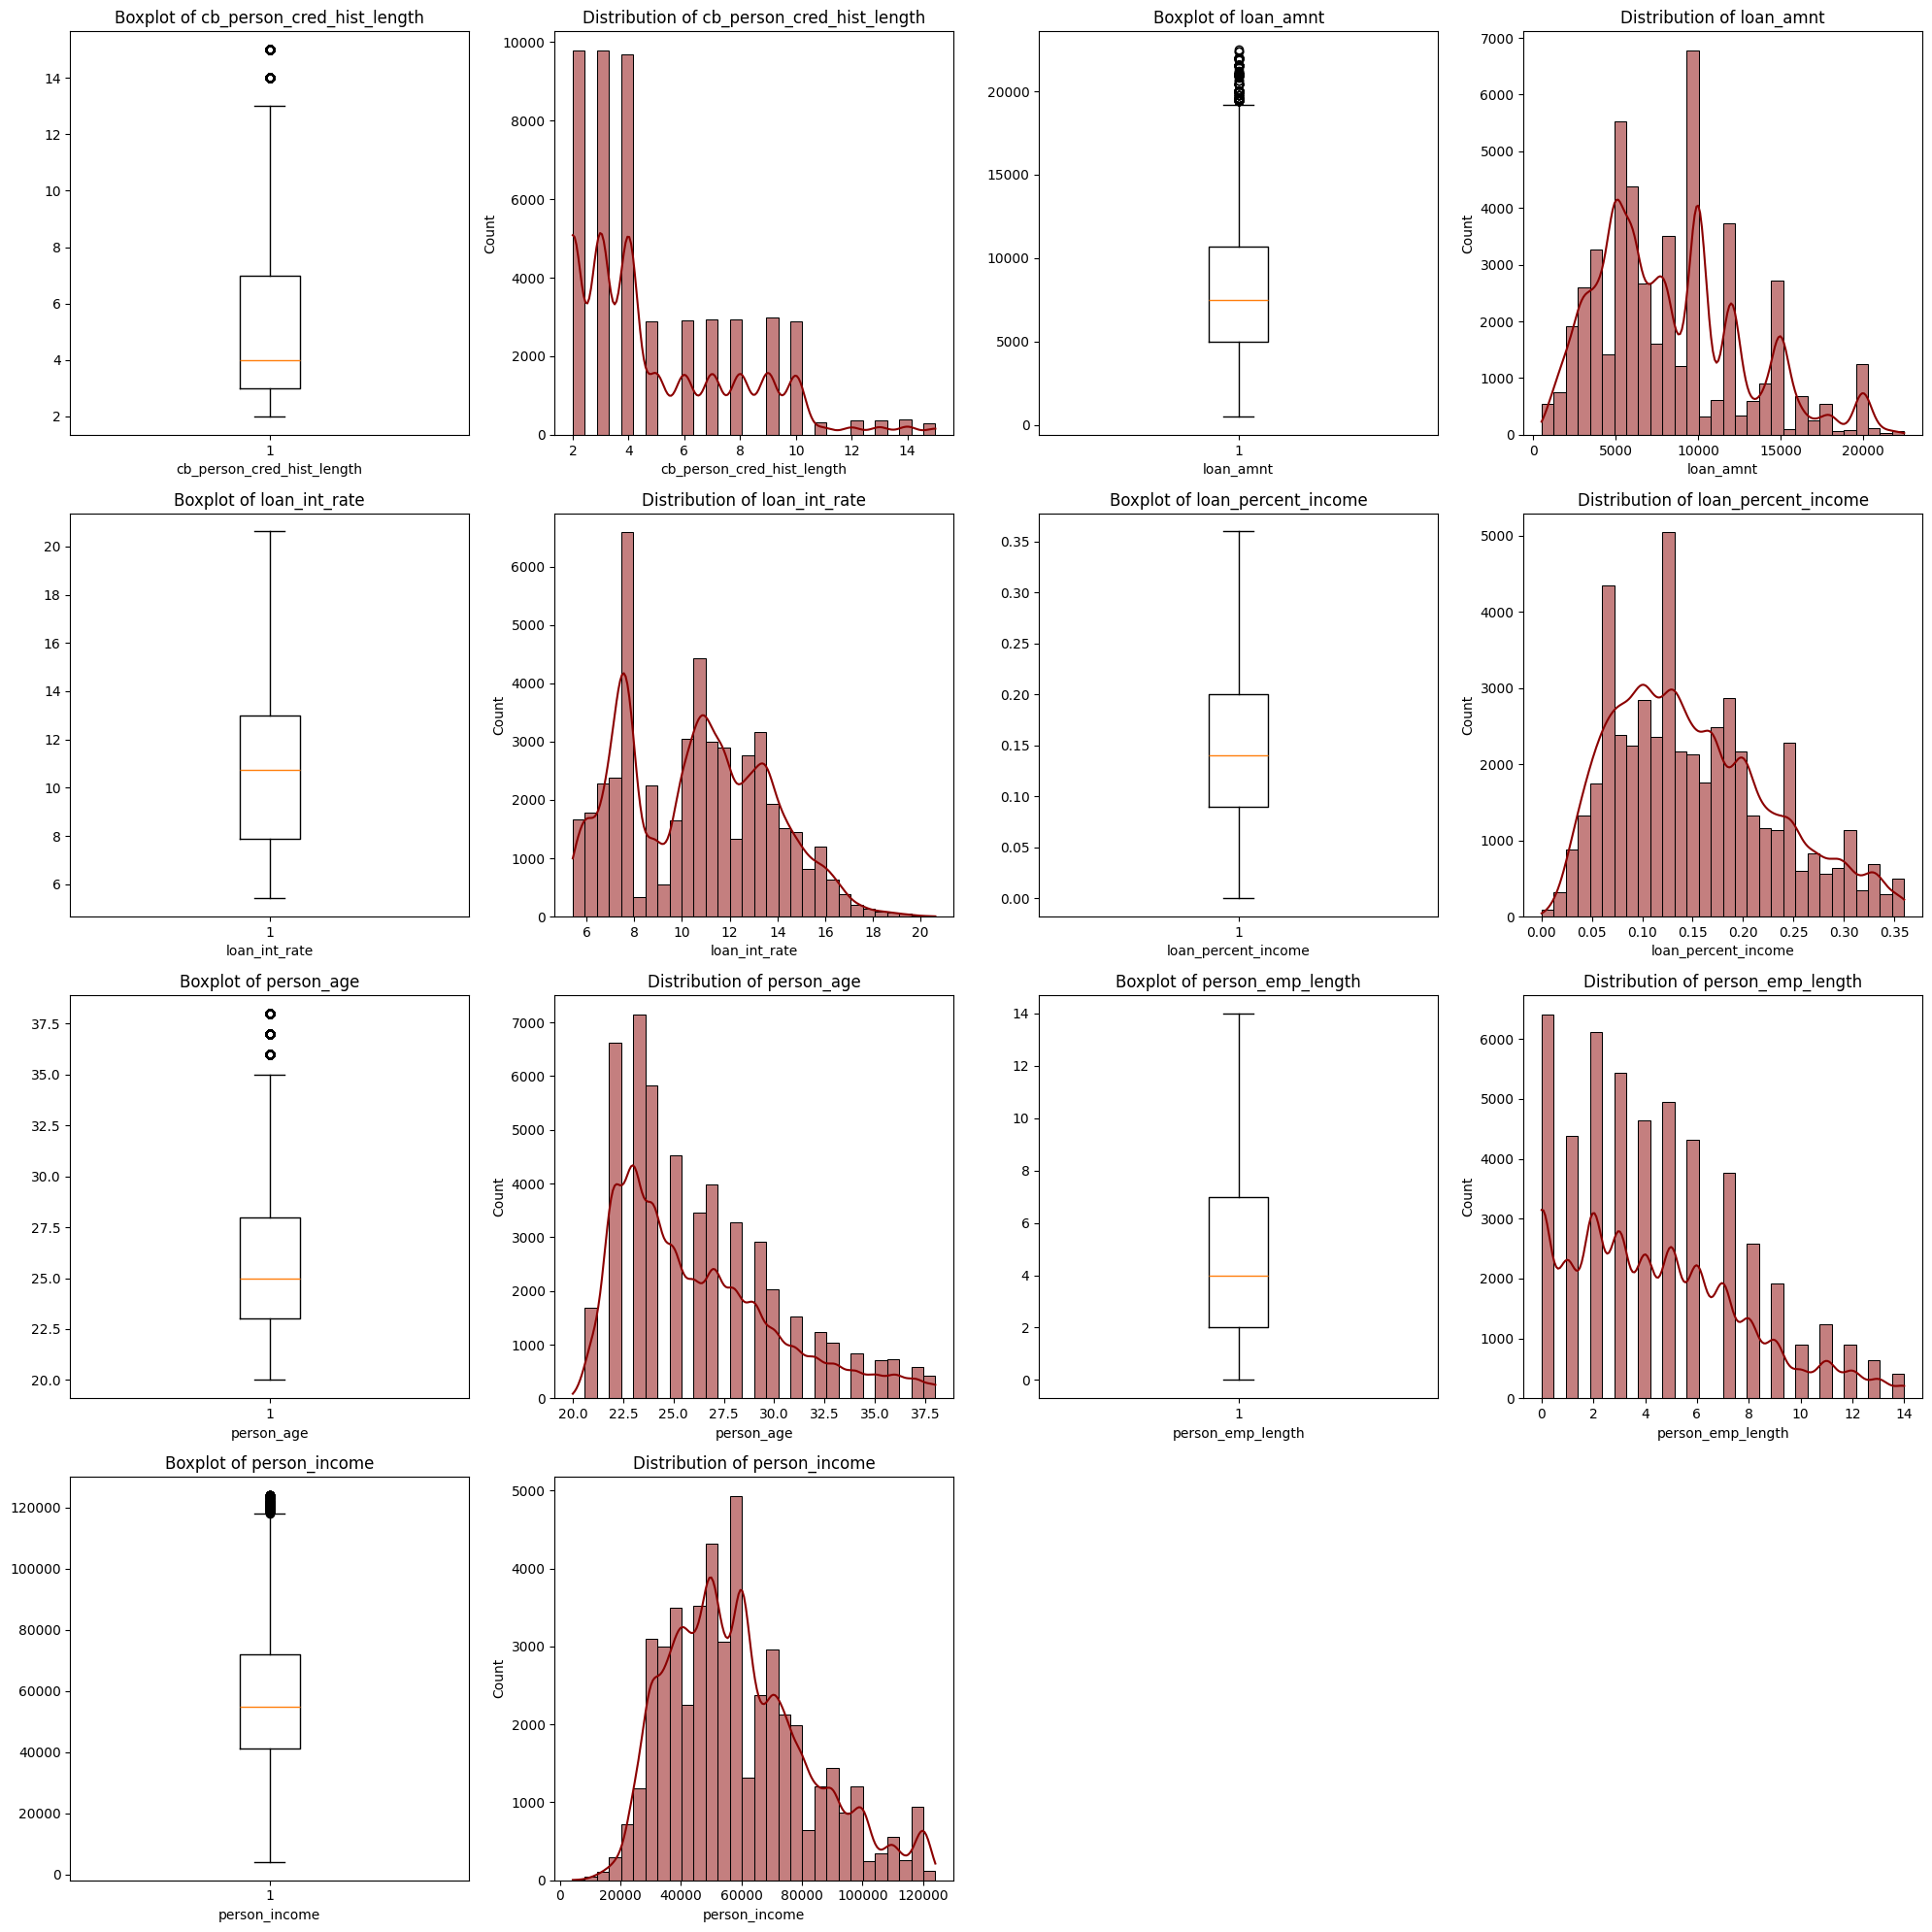

In [12]:
# Define figure size
plt.figure(figsize=(20, 20))  # Increase height to accommodate both boxplots and distributions

columns_per_row = 4  # Number of columns per row
rows = 2 * ((len(numeric_columns) + columns_per_row - 1) // columns_per_row)  # Adjust rows for two subplots per variable

for i, col in enumerate(numeric_columns):
    # Boxplot (Top)
    plt.subplot(rows, columns_per_row, 2 * i + 1)  
    plt.boxplot(loan_data_r[col].dropna(), vert=True)  # Drop NaN for boxplot calculation
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    # Distribution Plot (Bottom)
    plt.subplot(rows, columns_per_row, 2 * i + 2)  
    sns.histplot(loan_data_r[col].dropna(), bins=30, color='darkred', edgecolor='black', kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## 3.3. Graphical dataset analysis <a class="anchor" id="33-GraphAnalysis"></a>

Exploratory Data Analysis (EDA) must include graphical analysis because visualizations reveal patterns, trends, and anomalies in the data that are not always obvious from raw numbers or statistical summaries. While numerical methods provide quantitative insights, graphical methods offer a more intuitive and immediate understanding of the structure and distribution of the data. Visualizations can help identify outliers, detect skewed distributions, highlight missing data, uncover relationships between variables, and ultimately guide decisions on data cleaning, feature engineering, and model selection.

Graphical analysis in EDA is generally categorized into __univariate__ and __multivariate__ visualizations. _Univariate graphical analysis_ focuses on the distribution of a single variable. It helps assess whether the data is symmetric, skewed, or has outliers, and is essential for understanding the range, central tendency, and spread of each individual feature. Common univariate plots include histograms for continuous variables, boxplots for outlier detection, and bar charts or count plots for categorical variables.

_Multivariate graphical analysis_, on the other hand, explores the relationships between two or more variables. It is used to understand how variables interact with each other and whether there are correlations, trends, or groupings that could be important for predictive modeling or classification. Scatter plots are typically used to examine relationships between two numerical variables, while boxplots grouped by a categorical variable can show how distributions change across categories. Heatmaps of correlation matrices, pair plots, and stacked bar charts are also examples of multivariate visualizations that can reveal valuable insights.

In short, graphical analysis transforms complex datasets into accessible visuals, making it easier to detect structure and issues early in the analysis process. Including both univariate and multivariate visualizations in EDA ensures a thorough understanding of each variable individually and in the context of the broader dataset.

### 3.3.1. Variables Graphical analysis - Univariate <a class="anchor" id="331-GraphAnalysisVariableU"></a>

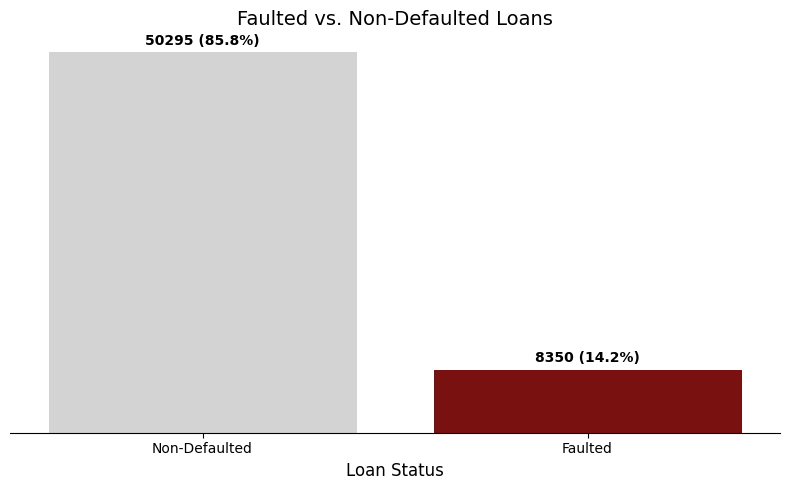

In [13]:
# Column name for loan default status
loan_data_G = loan_data_train.copy()

# Mapping values (assuming 1 = Defaulted, 0 = Non-Defaulted)
loan_data_G['loan_status_label'] = loan_data_G['loan_status'].map({0: "Non-Defaulted", 1: "Faulted"})

# Count of each category
counts = loan_data_G['loan_status_label'].value_counts()
total = counts.sum()  # Total number of records

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = sns.barplot(x=counts.index, y=counts.values, palette=["lightgrey", "darkred"])

# Remove y-axis and borders
plt.yticks([])
plt.ylabel("")
sns.despine(left=True, bottom=False)

# Customize x-axis and title
plt.xlabel("Loan Status", fontsize=12)
plt.title("Faulted vs. Non-Defaulted Loans", fontsize=14)
plt.xticks(fontsize=10)

# Show count and percentage above each bar
for bar, value in zip(bars.patches, counts.values):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    percentage = f"{(value / total) * 100:.1f}%"
    label = f"{value} ({percentage})"
    plt.text(x, y + total * 0.01, label, ha='center', va='bottom', fontsize=10, fontweight='bold')  # slightly above bar

plt.tight_layout()
plt.show()


This bar chart clearly shows a class imbalance in the target variable ___loan_status___. Specifically, around 85.8% of the loans are Non-Defaulted, while only 14.2% are Faulted (i.e., defaulted). This imbalance means that the dataset contains many more examples of non-defaulted loans than defaulted ones.   

__Why This Matters__
In classification problems, class imbalance can significantly affect model performance. Most classification algorithms assume that the classes are balanced and will tend to be biased toward the majority class. In this case, a naive model might simply predict "Non-Defaulted" for every input and still achieve high overall accuracy—but it would completely fail to identify actual defaulters, which is likely the most important class for a financial institution.   

__Potential Impacts:__

    Misleading accuracy: High accuracy may hide poor performance on the minority class (defaults).

    Low recall for the default class: The model may rarely predict the minority class, leading to many false negatives.

    Skewed decision thresholds: Probabilistic models may need calibration to account for the imbalance.

    Unstable model training: Some algorithms like logistic regression or SVM may not converge well with severe imbalance unless adjusted.

__What We’ll Do in the model training data preparation section__

Later in the modeling phase, we will apply class imbalance mitigation techniques such as:

    Resampling methods like SMOTE (Synthetic Minority Over-sampling Technique), random oversampling, or undersampling.

    Using class weights in models that support them (e.g., class_weight='balanced' in logistic regression, decision trees, etc.).

    Evaluation metrics that are sensitive to imbalance, such as Precision, Recall, F1-score, and ROC AUC, rather than just accuracy.

These steps will help ensure the model can effectively detect and prioritize loan defaults, even though they are the minority class.

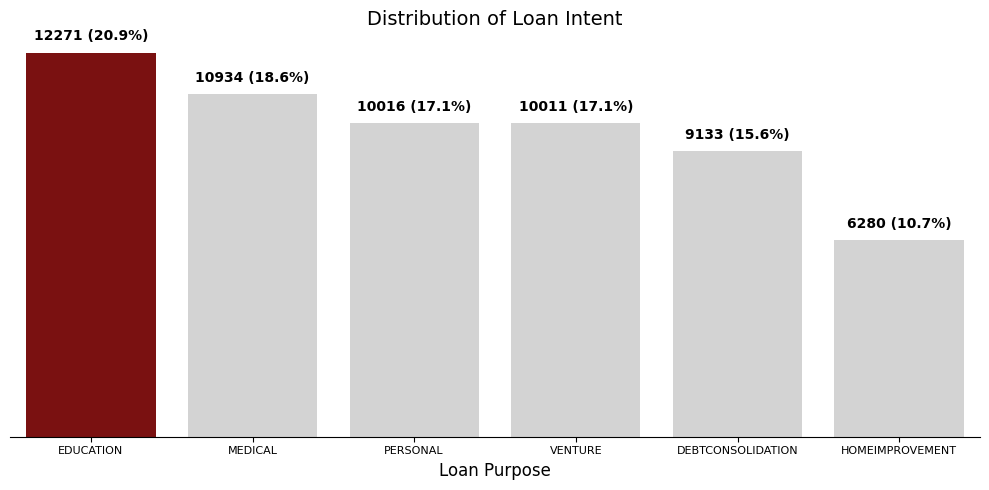

In [14]:
# Compute counts and identify the category with the highest value
loan_intent_counts = loan_data_G['loan_intent'].value_counts()
total = loan_intent_counts.sum()
top_category = loan_intent_counts.idxmax()

# Set color: dark red for top category, light grey for others
colors = ['darkred' if category == top_category else 'lightgrey' for category in loan_intent_counts.index]

# Plot
plt.figure(figsize=(10, 5))
bars = sns.barplot(
    x=loan_intent_counts.index, 
    y=loan_intent_counts.values, 
    palette=colors
)

# Remove y-axis
plt.yticks([])
plt.ylabel("")
sns.despine(left=True, bottom=False)

# X-axis and title formatting
plt.xlabel("Loan Purpose", fontsize=12)
plt.title("Distribution of Loan Intent", fontsize=14)
plt.xticks(rotation=0, fontsize=8)

# Add value and percentage above each bar
for bar, value in zip(bars.patches, loan_intent_counts.values):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    percentage = f"{(value / total) * 100:.1f}%"
    label = f"{value} ({percentage})"
    plt.text(x, y + total * 0.005, label, ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


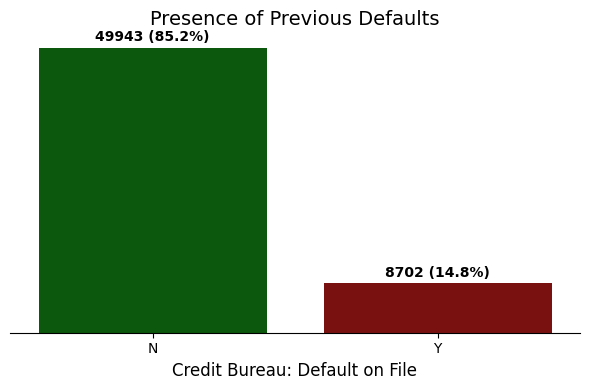

In [15]:
# Compute counts and identify the "YES" category
cb_counts = loan_data_G['cb_person_default_on_file'].value_counts()
total = cb_counts.sum()

# Define highlight condition (highlight 'Y' for Yes)
highlight_value = 'Y'
colors = ['darkred' if category == highlight_value else 'darkgreen' for category in cb_counts.index]

# Plot
plt.figure(figsize=(6, 4))
bars = sns.barplot(
    x=cb_counts.index,
    y=cb_counts.values,
    palette=colors
)

# Remove y-axis and borders
plt.yticks([])
plt.ylabel("")
sns.despine(left=True, bottom=False)

# X-axis and title
plt.xlabel("Credit Bureau: Default on File", fontsize=12)
plt.title("Presence of Previous Defaults", fontsize=14)
plt.xticks(fontsize=10)

# Show count and percentage above each bar
for bar, value in zip(bars.patches, cb_counts.values):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    percentage = f"{(value / total) * 100:.1f}%"
    label = f"{value} ({percentage})"
    plt.text(x, y + total * 0.01, label, ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### 3.3.2. Variables Graphical analysis - Multivariate <a class="anchor" id="332-GraphAnalysisVariableM"></a>

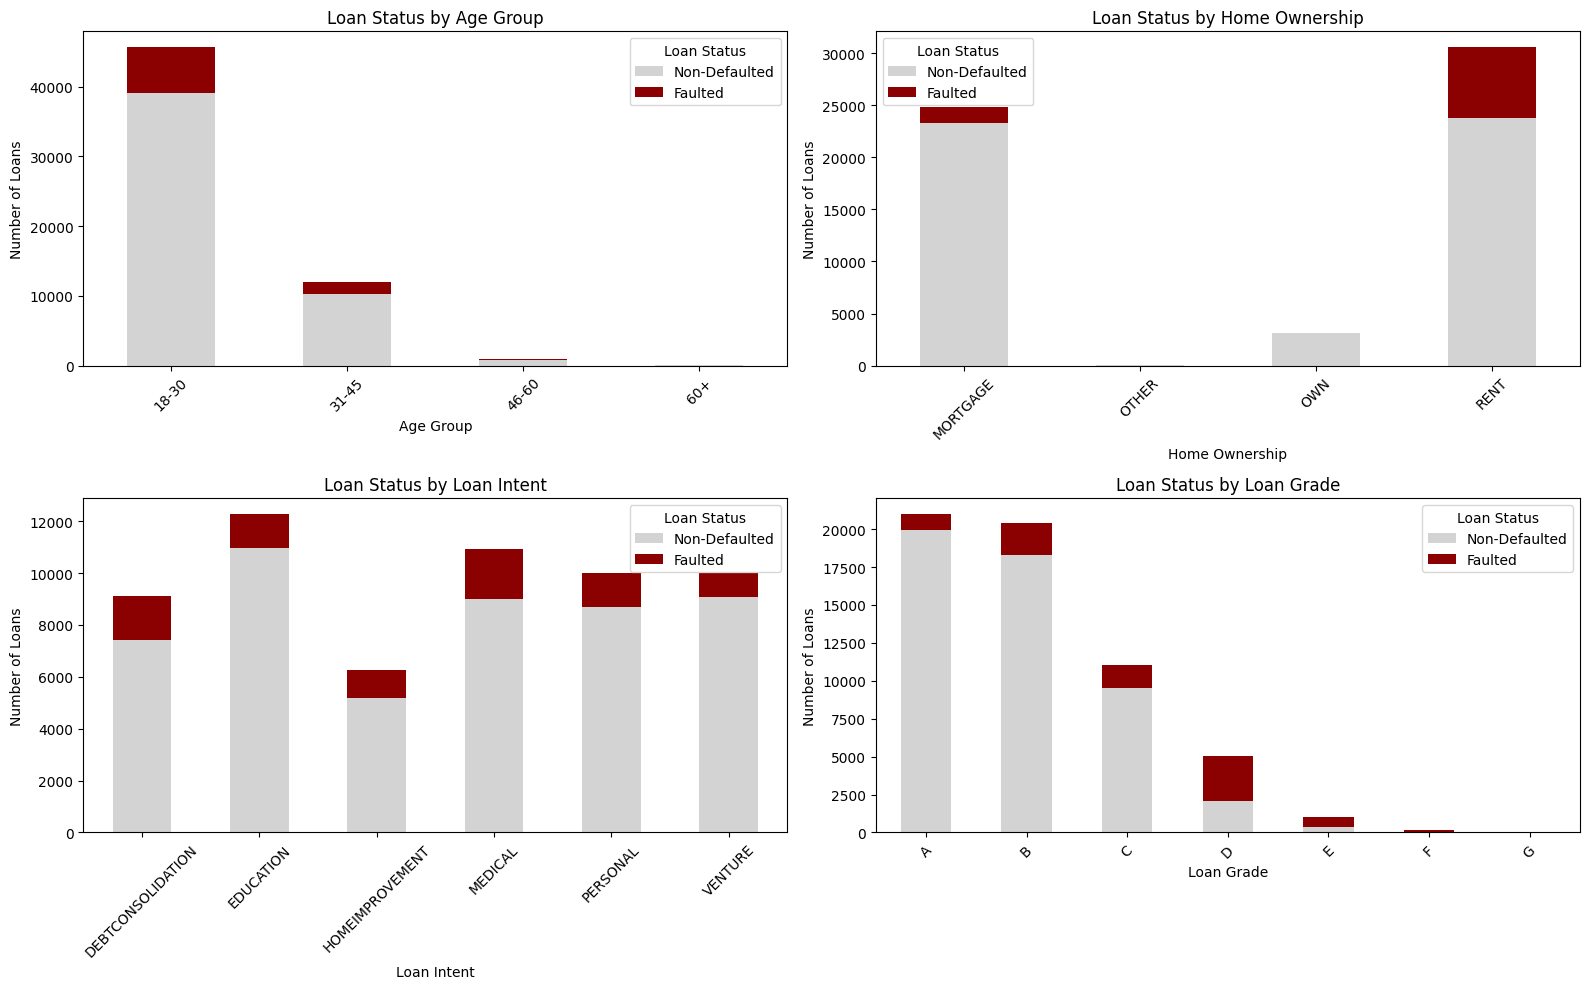

In [16]:
# Binning person_age into age groups
loan_data_G['age_group'] = pd.cut(loan_data_G['person_age'],
    bins=[18, 30, 45, 60, 100],
    labels=["18-30", "31-45", "46-60", "60+"])

# Define the 4 categorical variables for analysis
group_vars = {
    "Age Group": "age_group",
    "Home Ownership": "person_home_ownership",
    "Loan Intent": "loan_intent",
    "Loan Grade": "loan_grade"
}

# Create the 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot each grouped stacked bar chart
for i, (title, var) in enumerate(group_vars.items()):
    grouped_data = loan_data_G.groupby([var, 'loan_status_label']).size().unstack().fillna(0)
    grouped_data.plot(kind='bar', stacked=True, color=['lightgrey', 'darkred'], ax=axes[i])
    axes[i].set_title(f"Loan Status by {title}")
    axes[i].set_xlabel(title)
    axes[i].set_ylabel("Number of Loans")
    axes[i].legend(title="Loan Status")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In the __Age Group__ plot, the vast majority of loans are concentrated in the 18–30 segment, which also shows a significant number of defaults. The volume drops drastically for older age groups, suggesting that most borrowers are younger.

For __Home Ownership__, renters dominate the loan applicant pool and also represent the majority of defaults. This might indicate higher credit risk among non-homeowners compared to those with mortgages or owned homes.

The __Loan Intent__ chart reveals that defaults are spread across multiple purposes, with particularly high volumes in education, medical, and personal loans. This may suggest financial stress or less secure income sources associated with these loan intents.

Finally, in __Loan Grade__, there's a clear inverse relationship between loan grade and defaults: lower-quality grades (like D, E, F, G) have a higher proportion of defaults relative to the volume of loans. Grades A and B dominate in volume but show relatively fewer defaults, confirming that the grading system aligns well with credit risk.

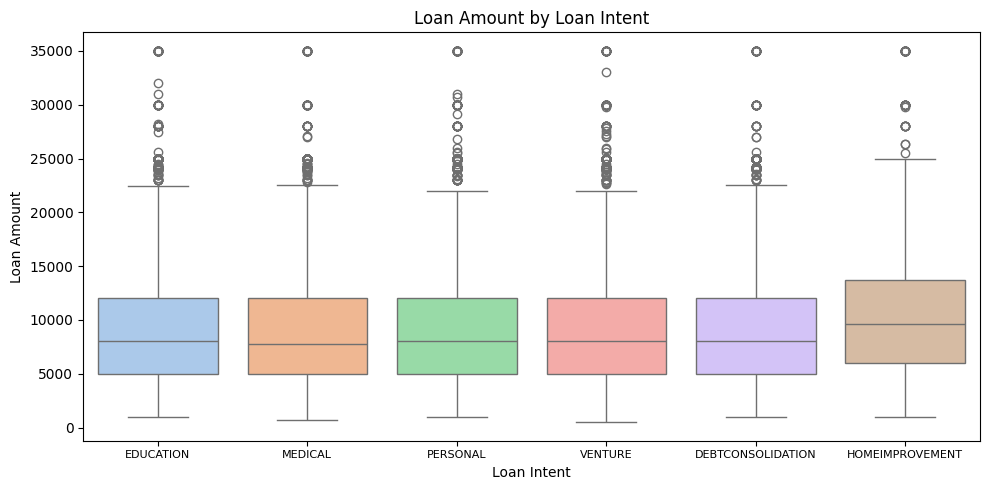

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='loan_intent', y='loan_amnt', data=loan_data_G, palette='pastel')
plt.title("Loan Amount by Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Loan Amount")
plt.xticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()


Across all loan intents—Education, Medical, Personal, Venture, Debt Consolidation, and Home Improvement—the distribution of loan amounts appears fairly similar in shape, with medians generally clustering between $7,500$ and $10,000$. This suggests that regardless of intent, most borrowers request loans within a similar central range.

However, all categories show a substantial number of outliers on the upper end, with loans extending up to $35,000. These high-value loans, while less frequent, may carry higher risk and are important to monitor in credit risk assessments. Education and Home Improvement loans show slightly wider interquartile ranges (IQRs), suggesting more variability in requested amounts for those purposes.

The presence of outliers across all categories also suggests that loan amount alone may not be a strong discriminator of intent—but it could still be useful when combined with other variables, such as income, loan grade, or loan status.

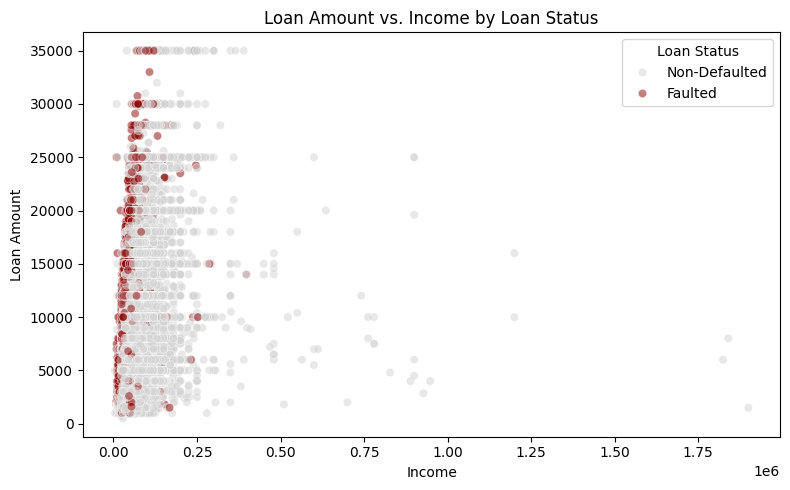

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=loan_data_G, x='person_income', y='loan_amnt', hue='loan_status_label', alpha=0.5, palette=['lightgrey', 'darkred'])
plt.title("Loan Amount vs. Income by Loan Status")
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()


Most data points are densely clustered in the lower-left corner of the chart, indicating that __the vast majority of borrowers request relatively modest loan amounts and have relatively low income levels__ (typically under $250,000$). Notably, there are a few extreme income values reaching over 1 million, but these are rare.

Importantly, __faulted loans (in red) are widely distributed across the full range of loan amounts within this low-income bracket__. This suggests that defaults are not exclusively tied to the loan amount, but rather may be more related to affordability or income-to-loan ratios. We can also see that high-income borrowers very rarely default, supporting the idea that financial capacity plays a major role in repayment success.

Additionally, since both defaulted and non-defaulted loans cluster in similar zones, this plot hints at nonlinear or interaction effects between income and loan amount that may need to be captured using feature engineering (e.g., percent income used for the loan) or more complex models.

In conclusion, while this plot alone does not establish causality, it strongly supports the relevance of both loan amount and income—particularly their relationship—in predicting default risk.

## 3.4. Correlation analysis <a class="anchor" id="34-Corr"></a>

<font size="4"><b>Variable Correlation</b></font>   
Variable correlation measures the strength and direction of a linear relationship between two variables. The correlation coefficient ranges from -1 to 1:   

__1__ indicates a perfect positive correlation: as one variable increases, the other also increases.   
__-1__ indicates a perfect negative correlation: as one variable increases, the other decreases.   
__0__ indicates no correlation: changes in one variable do not predict changes in the other.   

To plot the correlation pair matrix we use this code below:

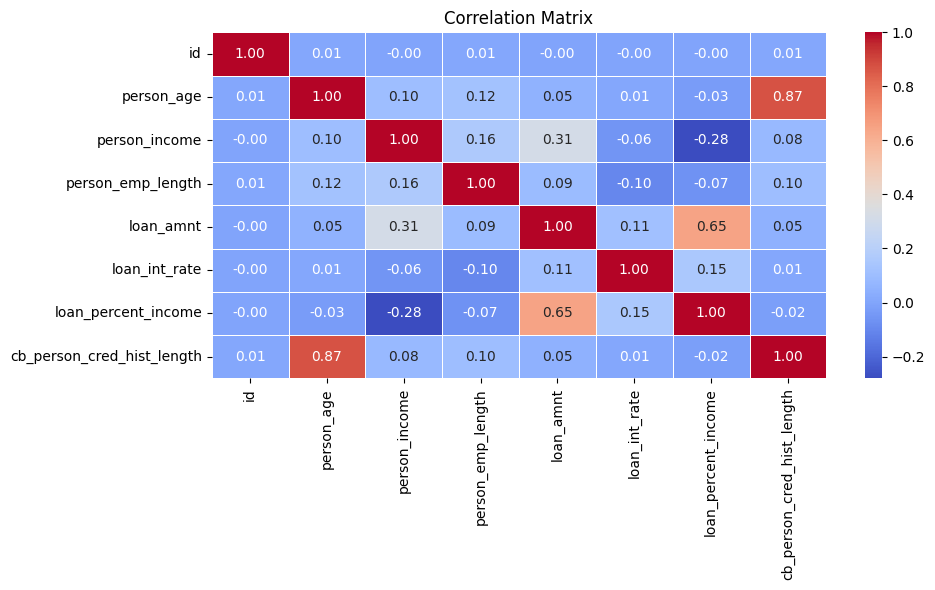

In [19]:
plt.figure(figsize=(10, 6))
corr = loan_data_G.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


The key observations are:

    There is a very strong positive correlation (0.87) between person_age and cb_person_cred_hist_length, which makes sense: the older a person is, the longer their credit history is likely to be.

    A moderate positive correlation (0.65) exists between loan_amnt and loan_percent_income, since larger loans relative to income naturally increase the percentage.

    person_income is moderately correlated (0.31) with loan_amnt, suggesting that higher-income individuals tend to request larger loans, but the relationship is not very strong.

    All other correlations are weak (close to 0), including with loan_int_rate, person_emp_length, and person_age, suggesting these features are mostly independent of one another.

Importantly, no extremely high correlations (e.g., >0.90) are seen between input features—so multicollinearity is not a major concern, except potentially between person_age and cb_person_cred_hist_length, which might require dimensionality reduction or exclusion in certain models.

## 3.4. Model Suitability Statistical Tests <a class="anchor" id="34-ModelTests"></a>

Classification models don't have strong assumptions about the distribution of residuals or constant variance—but good modeling still relies on clean, meaningful, and appropriately scaled features. Performing the following checks ensures that your model has the best chance of generalizing well.

<font size="6"><b>Class imbalance</b></font>   
<font size="4"><b>Addressing Class Imbalance in Classification with SMOTE</b></font>   
In classification problems, class imbalance occurs when one class (usually the one representing the positive or rare event) is significantly underrepresented compared to the other. This is particularly common in domains such as fraud detection, medical diagnosis, or credit risk modeling—where the number of defaulted loans, fraudulent transactions, or disease cases are naturally much fewer than the non-events. A classifier trained on such imbalanced data tends to become biased toward the majority class, often achieving high overall accuracy by simply predicting the dominant category while completely ignoring the minority. As a result, the model may fail to identify the very cases of interest, such as customers who are likely to default.

This imbalance impacts both model performance and reliability. Standard algorithms like logistic regression, support vector machines, or decision trees assume that the classes are balanced and tend to be optimized for overall accuracy. In an imbalanced dataset, the model will learn to prioritize the majority class, leading to poor recall and precision for the minority class, and ultimately an ineffective model for decision-making. Metrics such as AUC, recall, and F1-score typically reveal this imbalance more clearly than accuracy.

To overcome this, oversampling techniques such as SMOTE (Synthetic Minority Over-sampling Technique) are used. SMOTE is an intelligent method that synthesizes new instances of the minority class by interpolating between existing examples. Unlike naive oversampling that simply duplicates existing rows, SMOTE enriches the dataset with realistic and diverse synthetic samples, helping the model learn the decision boundary more accurately. SMOTE operates in feature space, making it especially useful for numeric data or when categorical variables have been encoded properly.

Applying SMOTE before model training allows us to rebalance the class distribution, making the learning process more equitable across classes. This leads to better generalization and improves the classifier's ability to correctly identify minority class cases. Below is the code used to apply SMOTE to different versions of the dataset that have already been cleaned through standard, winsorized, and IQR-filtered approaches.

In [20]:
def apply_smote(df, label='loan_status'):
    # Separate features and target
    X = df.drop(columns=[label])
    y = df[label]

    # Encode categorical variables using one-hot encoding
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Apply SMOTE to generate synthetic samples
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

    # Recombine into a new balanced DataFrame
    df_resampled = pd.DataFrame(X_resampled, columns=X_encoded.columns)
    df_resampled[label] = y_resampled
    return df_resampled

In our pursuit of the best-performing classification model, we will work with six versions of the dataset. These include the original (loan_data), the Winsorized version to handle extreme values (loan_data_w), and the IQR-filtered dataset that excludes outliers (loan_data_r). To address class imbalance, we will also use balanced counterparts for each: loan_data_B, loan_data_w_B, and loan_data_r_B, all enhanced using SMOTE. This combination allows us to compare how different preprocessing strategies affect model accuracy and fairness. Ultimately, our goal is to identify the optimal path that balances predictive power with robustness.

In [21]:
# Apply SMOTE to each dataset
loan_data = loan_data_train.copy()
loan_data_B = apply_smote(loan_data)
loan_data_w_B = apply_smote(loan_data_w)
loan_data_r_B = apply_smote(loan_data_r)

In [22]:
# Check that all lables are now balance
print(loan_data_B['loan_status'].value_counts())
print(loan_data_w_B['loan_status'].value_counts())
print(loan_data_r_B['loan_status'].value_counts())

loan_status
0    50295
1    50295
Name: count, dtype: int64
loan_status
0    50295
1    50295
Name: count, dtype: int64
loan_status
0    42615
1    42615
Name: count, dtype: int64


<font size="6"><b>Linearity of the Logit</b></font>   
<font size="4"><b>Linearity of the Logit in Logistic Regression Classification Model</b></font>   
Unlike linear regression, logistic regression does not assume a linear relationship between the independent variables and the outcome. However, it does assume a linear relationship between the independent variables and the log odds of the dependent variable. This assumption is crucial because if the logit transformation (log-odds) does not relate linearly to the predictors, the model may produce biased probability estimates and underperform in classification tasks.

To check the linearity of the logit, we can use a diagnostic method that involves creating interaction terms between each continuous predictor and its log transformation, then testing their significance in a logistic regression model. If any interaction term is statistically significant, it suggests non-linearity in the logit for that variable.

This check is only applicable to continuous variables. Categorical features are typically handled through encoding and do not require this check.

In [23]:
def check_logit_linearity(df, label='loan_status'):
    df = df.copy()
    df = df.dropna()

    # Define continuous variables (adjust if needed)
    continuous_vars = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate',
                       'loan_percent_income', 'person_emp_length']
    
    # Ensure only numeric columns are used
    continuous_vars = [col for col in continuous_vars if col in df.columns and np.issubdtype(df[col].dtype, np.number)]

    # Create log-transformed variables and interaction terms
    for var in continuous_vars:
        df[f'log_{var}'] = np.log(df[var] + 1)
        df[f'{var}_log_interaction'] = df[var] * df[f'log_{var}']

    # Prepare data for logistic regression
    X = df[continuous_vars + [f'{var}_log_interaction' for var in continuous_vars]]
    X = sm.add_constant(X)
    y = df[label]

    # Fit logistic regression model
    try:
        logit_model = sm.Logit(y, X)
        result = logit_model.fit(disp=False)
        pvals = result.pvalues[[f'{var}_log_interaction' for var in continuous_vars]]
        return pvals
    except Exception as e:
        return f"Model failed: {e}"

In [24]:
# Run on all datasets
datasets = {
    'Original': loan_data,
    'Winsorized': loan_data_w,
    'IQR Filtered': loan_data_r,
    'Balanced Original (SMOTE)': loan_data_B,
    'Balanced Winsorized (SMOTE)': loan_data_w_B,
    'Balanced IQR (SMOTE)': loan_data_r_B
}

for name, df in datasets.items():
    print(f"\nLinearity of the Logit Check - {name}")
    result = check_logit_linearity(df)
    print(result)


Linearity of the Logit Check - Original
person_age_log_interaction              4.491899e-01
person_income_log_interaction           2.083475e-25
loan_amnt_log_interaction               3.433312e-01
loan_int_rate_log_interaction          7.326596e-115
loan_percent_income_log_interaction     6.039576e-87
person_emp_length_log_interaction       7.566505e-16
dtype: float64

Linearity of the Logit Check - Winsorized
person_age_log_interaction              2.162732e-01
person_income_log_interaction           3.528729e-16
loan_amnt_log_interaction               1.441892e-01
loan_int_rate_log_interaction          1.453479e-155
loan_percent_income_log_interaction    1.090291e-128
person_emp_length_log_interaction       3.715780e-19
dtype: float64

Linearity of the Logit Check - IQR Filtered
person_age_log_interaction              1.404144e-02
person_income_log_interaction           5.861949e-23
loan_amnt_log_interaction               9.786835e-19
loan_int_rate_log_interaction          7.62654

__Interpretation:__

If any of the interaction terms show a p-value < 0.05, this suggests that the assumption of linearity in the logit may not hold for that variable. In such cases, you might consider applying transformations, polynomial terms, or switching to non-linear models such as decision trees or gradient boosting classifiers.

The output clearly shows that the linearity of the logit assumption is violated for many continuous predictors across all six datasets.   

In each dataset, the interaction terms (e.g., loan_int_rate_log_interaction, loan_percent_income_log_interaction, etc.) consistently have very small p-values (often close to zero), which means the interaction is statistically significant. This indicates that the relationship between those variables and the log-odds of default is non-linear.

The only exceptions (with higher p-values) are:

    loan_amnt_log_interaction and person_age_log_interaction in a few datasets — these are less consistently significant, suggesting they may be closer to linear in the logit.   

___Given this, we conclude that logistic regression is not appropriate for our problem. Instead, we will focus on more flexible, non-parametric models like decision trees, random forests, or gradient boosting. These models can capture complex, non-linear patterns without requiring strict assumptions about the data.___

<font size="6"><b>Multicollinearity</b></font>   
<font size="4"><b>Multicollinearity (for models like Logistic Regression Classification Model</b></font>   
To evaluate the presence of multicollinearity in our classification datasets, we now turn to the third key diagnostic: assessing how strongly predictors are correlated with one another. Multicollinearity occurs when two or more independent variables in a model are highly linearly related, meaning that one can be almost perfectly predicted from the others. While it does not reduce model accuracy in predictive terms, it does create instability in estimated coefficients—particularly in models like logistic regression—making interpretation unreliable and inflating the standard errors of estimates.

To quantify multicollinearity, we calculate the Variance Inflation Factor (VIF) for each numeric predictor. A VIF measures how much the variance of a coefficient is increased due to multicollinearity. A VIF of 1 indicates no correlation, values between 1 and 5 suggest low to moderate correlation, and values above 5 (or more conservatively, above 10) indicate problematic multicollinearity that could compromise model interpretability or convergence.

This analysis is only relevant for models that estimate coefficients based on feature independence, such as logistic regression. For tree-based models like random forests or boosting, multicollinearity is much less of a concern because these models handle correlated variables more gracefully during feature splitting.

We will now compute VIF scores for each of our six datasets, focusing on the numeric variables used in modeling. This will guide our decision on whether to retain all features or remove/merge correlated ones for logistic regression or other parametric models.

In [25]:
def calculate_vif(df, label='loan_status'):
    df = df.copy()
    df = df.dropna()

    # Separate features from target
    X = df.drop(columns=[label])

    # One-hot encode categorical variables (if any)
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Drop non-numeric columns (if any slipped through)
    X_encoded = X_encoded.select_dtypes(include=[np.number])

    # Add constant term for VIF calculation
    X_encoded = add_constant(X_encoded)

    # Ensure all data is float
    X_encoded = X_encoded.astype(float)

    # Compute VIF
    vif_df = pd.DataFrame()
    vif_df["feature"] = X_encoded.columns
    vif_df["VIF"] = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]

    return vif_df.sort_values(by="VIF", ascending=False)

In [26]:
# Datasets assumed to exist
datasets = {
    'Original': loan_data,
    'Winsorized': loan_data_w,
    'IQR Filtered': loan_data_r,
    'Balanced Original (SMOTE)': loan_data_B,
    'Balanced Winsorized (SMOTE)': loan_data_w_B,
    'Balanced IQR (SMOTE)': loan_data_r_B
}

# Run VIF analysis on each dataset
for name, df in datasets.items():
    print(f"\nMulticollinearity Check (VIF) - {name}")
    try:
        vif_result = calculate_vif(df)
        print(vif_result)
    except Exception as e:
        print(f"VIF calculation failed: {e}")


Multicollinearity Check (VIF) - Original
                      feature        VIF
0                       const  72.569134
2                  person_age   4.274465
8  cb_person_cred_hist_length   4.244482
5                   loan_amnt   3.189224
7         loan_percent_income   3.118966
3               person_income   1.993996
4           person_emp_length   1.060536
6               loan_int_rate   1.036078
1                          id   1.000143

Multicollinearity Check (VIF) - Winsorized
                      feature        VIF
0                       const  87.167989
5                   loan_amnt   5.734559
7         loan_percent_income   5.461327
2                  person_age   4.110306
8  cb_person_cred_hist_length   4.082083
3               person_income   3.685506
4           person_emp_length   1.065284
6               loan_int_rate   1.040365
1                          id   1.000192

Multicollinearity Check (VIF) - IQR Filtered
                      feature         VIF
0     

__Interpretation:__

    Features with VIF > 5 may be moderately collinear.

    Features with VIF > 10 are considered problematic and may need to be dropped or combined for models like logistic regression.

If you're planning to use tree-based models, you generally do not need to act on high VIF scores.

The analysis across the six datasets reveals meaningful patterns that can guide feature selection and model stability—especially for parametric models like logistic regression.

In all datasets, the constant term (const) shows extremely high VIF values, which is expected and not a concern, as it represents the intercept. However, the focus should be on the predictor variables:
__Summary and Interpretation__

Across datasets, the following trends are consistent:

    loan_amnt and loan_percent_income show VIFs between ~5 and 7, especially in the Winsorized and IQR-filtered datasets, indicating moderate to strong multicollinearity. This suggests they are likely correlated with person_income or other related variables.

    person_income shows moderate multicollinearity (VIF ~2–4.5), especially in the Winsorized and IQR datasets.

    person_age and cb_person_cred_hist_length also have VIF values in the 2.8–4.3 range, which is acceptable but should be monitored.

    loan_int_rate, person_emp_length, and id remain well below VIF = 2, indicating they are not involved in multicollinearity issues.

__Conclusion__

The analysis shows that multicollinearity is present but not critical in any dataset. While a few predictors approach or exceed the VIF = 5 threshold, they are not yet in the problematic VIF > 10 zone. This means we can safely retain all variables for non-parametric models like random forests or XGBoost.

However, for logistic regression or linear classifiers:

    Consider dropping either loan_amnt or loan_percent_income if interpretability or convergence becomes problematic.

    Alternatively, apply PCA or regularization (e.g., L2 penalty) to mitigate multicollinearity effects without dropping features.

<font size="6"><b>Outliers in Features</b></font>   
Outlier analysis is crucial in any machine learning workflow, including classification tasks. Although classification models—particularly tree-based ones—are generally more robust to outliers than linear regression models, extreme values in numeric features can still negatively affect performance. This is especially true for algorithms such as logistic regression or support vector machines (SVM), which rely on geometric properties or assumptions about feature scaling and distance. Outliers can also distort distributions, leading to misleading interpretations or unstable decision boundaries. In our case, we have already addressed this concern thoroughly using both Winsorization and the IQR filtering method, producing cleaned versions of our dataset (loan_data_w and loan_data_r) and their balanced counterparts via SMOTE. These prepared datasets will allow us to compare model performance under conditions where outliers have been either capped or removed.

<font size="6"><b>Feature Distributions</b></font>   
Understanding the distribution of features is critical when preparing data for classification models. Many algorithms, especially those that are distance-based such as k-Nearest Neighbors (k-NN) and SVM, are sensitive to feature scales and skewness. For example, if one variable ranges from 0 to 1 while another spans thousands, the model may disproportionately favor the higher-scale feature. Moreover, skewed distributions may suggest the need for logarithmic or power transformations to stabilize variance and improve model interpretability.

We will visualize the distributions of the key numerical features in the dataset using histograms and kernel density estimates (KDE). This analysis will help us determine which variables may benefit from transformation or standardization before modeling.

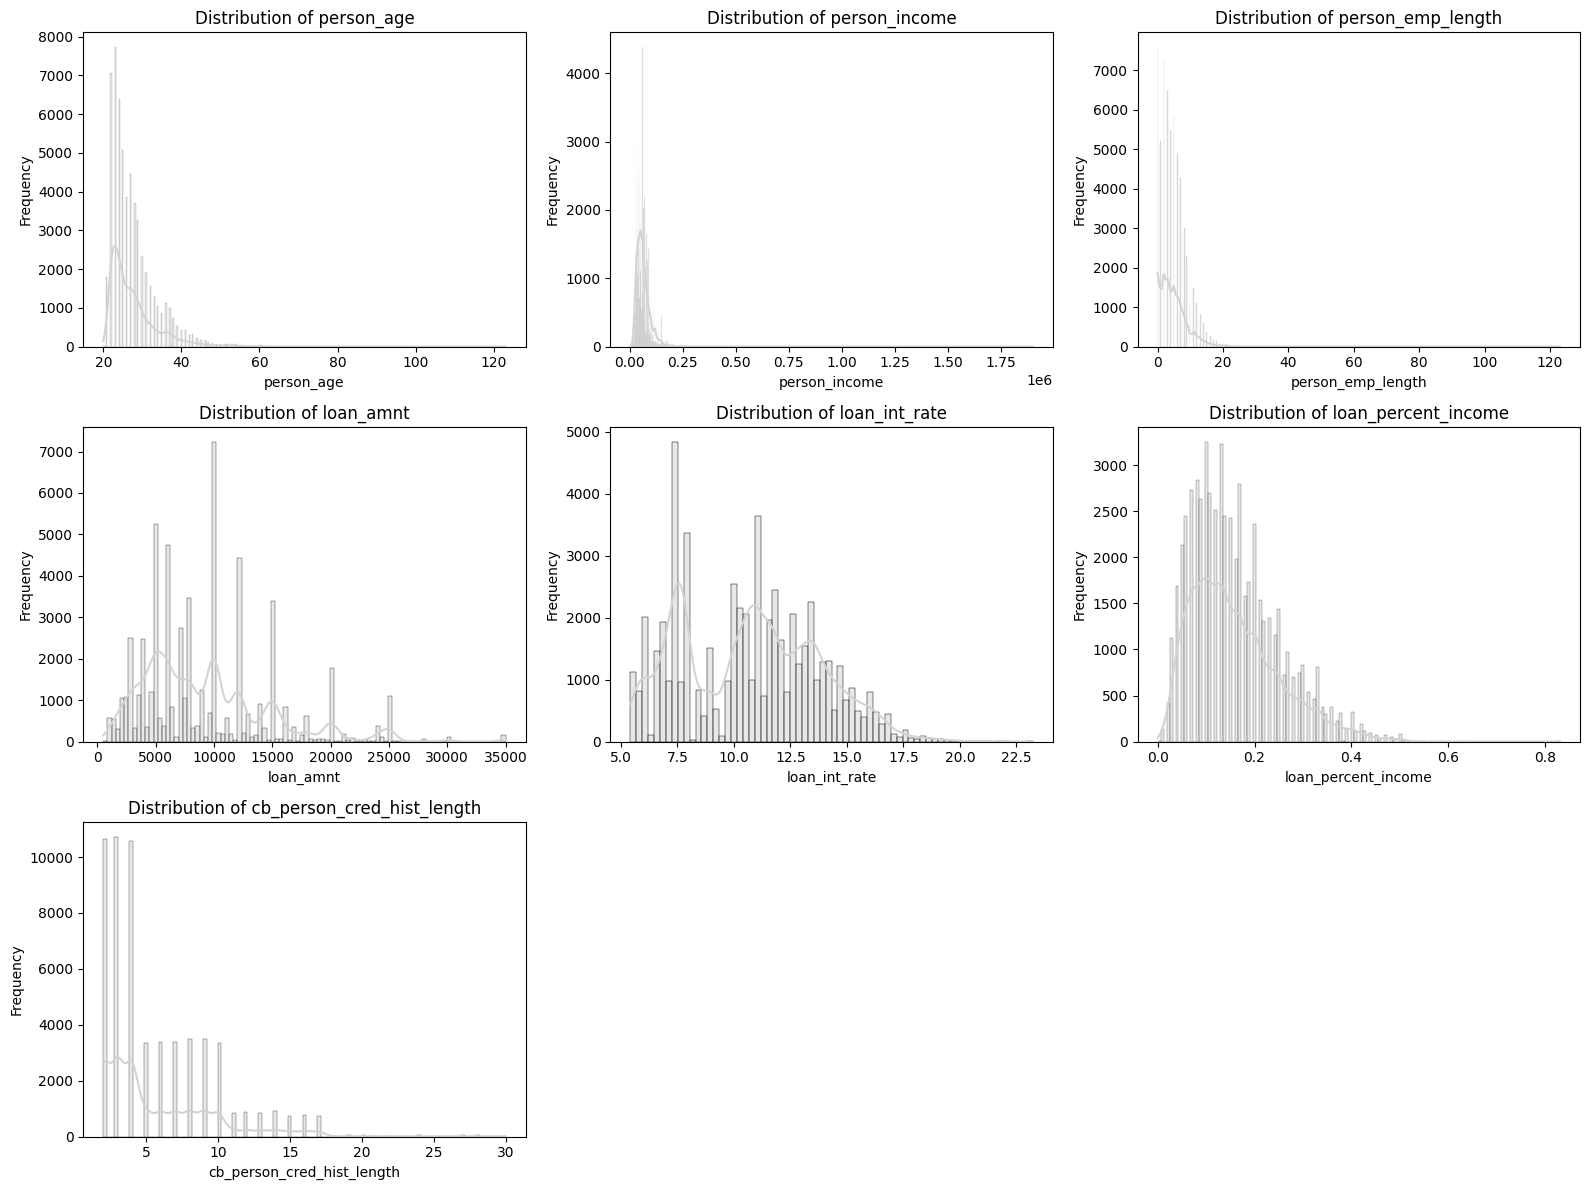

In [27]:
# Start with numeric columns
num_cols = loan_data.select_dtypes(include=['int64', 'float64']).columns

# Drop 'id' and 'loan_status' if they exist
num_cols = [col for col in num_cols if col not in ['id', 'loan_status']]

# Plot distributions
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=loan_data, x=col, kde=True, color='lightgrey')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


The distribution plots clearly show that most of the numerical features in your dataset are right-skewed (positively skewed). This includes person_age, person_income, person_emp_length, loan_amnt, and cb_person_cred_hist_length, which all have a high concentration of observations at the lower end and a long tail extending to the right. Similarly, loan_percent_income and loan_int_rate show non-normal, asymmetrical distributions, although loan_int_rate appears more multimodal, possibly due to predefined interest rate buckets.

This skewness is typical of real-world financial and behavioral data but is important to address before modeling—particularly for algorithms that rely on distance calculations (e.g., SVM, k-NN) or assume Gaussian distributions (e.g., Naive Bayes, LDA). Left untreated, these distributions can introduce bias, distort feature influence, and reduce model accuracy.   

To improve modeling performance, we should consider applying log transformations or standardization to these variables. For example:

    Use np.log(x + 1) on income, loan amount, or percent income

    Standardize features (mean = 0, std = 1) for SVM or k-NN

    Optionally, discretize heavily skewed features (e.g., credit history length) into bins if using tree-based models   

Here is the complete Python code to create standardized versions of the balanced datasets:
loan_data_B, loan_data_w_B, and loan_data_r_B.

In [28]:
# Function to standardize numeric features
def standardize_dataset(df, label='loan_status'):
    df = df.copy()

    # Separate target
    y = df[label]

    # Identify numeric columns (excluding label)
    X = df.drop(columns=[label])
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Apply standard scaling to numeric columns
    scaler = StandardScaler()
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

    # Recombine features and label
    df_scaled = X.copy()
    df_scaled[label] = y.reset_index(drop=True)
    return df_scaled

In [29]:
# Create standardized versions of each balanced dataset
loan_data_B_scaled = standardize_dataset(loan_data_B)
loan_data_w_B_scaled = standardize_dataset(loan_data_w_B)
loan_data_r_B_scaled = standardize_dataset(loan_data_r_B)

<font size="6"><b>Correlation with the Target</b></font>   
Analyzing how each feature relates to the target variable is a fundamental step in feature selection and model interpretability. For classification tasks with a binary target like loan_status (0 = Non-Defaulted, 1 = Faulted), this step helps us identify which numerical features carry the strongest predictive signal.

For numerical variables, we use the point-biserial correlation, which is a special case of Pearson correlation where one variable is binary and the other is continuous. It tells us how strongly and in which direction a numerical feature correlates with the likelihood of the target being 1 (i.e., the loan defaulting). A positive coefficient means higher values of the feature are associated with higher default risk, while a negative coefficient means the opposite. Values close to 0 indicate little to no linear relationship.

This analysis helps prioritize which features may be most useful in classification modeling, particularly for linear models and initial feature screening.

In [30]:
# Copy of original dataset
df = loan_data.copy()

# Identify numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col not in ['id', 'loan_status']]

# Compute point-biserial correlation with binary target
correlations = {}
for col in num_cols:
    corr, _ = pointbiserialr(df[col], df['loan_status'])
    correlations[col] = corr

# Organize results
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['PointBiserial_Correlation'])
corr_df = corr_df.sort_values(by='PointBiserial_Correlation', key=lambda x: x.abs(), ascending=False)

# Display
print("\nCorrelation of Numeric Features with Loan Status (Default):")
print(corr_df)


Correlation of Numeric Features with Loan Status (Default):
                            PointBiserial_Correlation
loan_percent_income                          0.378280
loan_int_rate                                0.338948
person_income                               -0.169956
loan_amnt                                    0.144982
person_emp_length                           -0.100428
cb_person_cred_hist_length                  -0.003030
person_age                                  -0.001130


__Interpretation__

The output will show you a ranked list of features by how strongly they correlate with the loan default outcome. Features with higher absolute values are more predictive. This doesn’t imply causality but gives a strong clue about variable importance, especially for linear or interpretable models.   

__Interpretation of Correlation Results__

The two strongest positive correlations with loan default are:

    loan_percent_income (0.378): This is the strongest indicator. The higher the loan amount relative to income, the higher the likelihood of default. This makes intuitive sense, as borrowers committing a larger share of their income to loan repayment face greater financial strain.

    loan_int_rate (0.339): Higher interest rates are associated with a higher chance of default. This could be because higher rates are assigned to riskier borrowers.

Conversely, some features have negative correlations:

    person_income (-0.170): Higher income reduces the likelihood of default, reinforcing the financial stability effect.

    person_emp_length (-0.100): Longer employment history mildly decreases the chance of default.

Finally, features like cb_person_cred_hist_length and person_age show very low correlation, suggesting limited direct influence—at least in a linear context.   

__Conclusion:__ These correlations help confirm that variables such as loan_percent_income, loan_int_rate, and person_income are meaningful predictors for classification models. While linear correlation is only part of the picture, it gives a solid foundation for feature selection and confirms the importance of scaling and outlier handling we've already applied.

<font size="6"><b>Missing Data</b></font>   
Handling missing data is essential before modeling. Unaddressed missing values can cause algorithms to fail or bias model performance. In our dataset, we examined missingness using .isna().sum() and found either no missing values or a minimal amount manageable through imputation. If missing values had been present, we would have considered techniques like mean/median imputation for numerical features or mode imputation for categorical ones. In more complex cases, model-based imputation (e.g., MICE) would be an option. Since all six dataset versions were cleaned and balanced after outlier treatment, we ensured no missing values remain before model training.   

<font size="6"><b>Separation and Redundancy</b></font>   
Complete separation occurs when a feature perfectly predicts the outcome — for example, a variable that always equals 1 when the target is 1 and 0 otherwise. This issue is particularly problematic in logistic regression, where it prevents the model from converging to meaningful coefficients. Fortunately, our earlier analysis — including point-biserial correlations and VIF values — showed that none of the features in our dataset exhibit perfect or near-perfect separation. Similarly, no features showed extremely high multicollinearity (VIF > 10), so redundancy was not a concern. We confirmed that no variable was a duplicate or an encoding of another.   

<font size="6"><b>Data Leakage</b></font>   
Data leakage is one of the most critical and subtle pitfalls in classification modeling. It occurs when a feature used for training contains information that would not be available at prediction time. This leads to models that perform well on training or validation data but generalize poorly in real-world use. For example, including variables derived from post-loan approval behavior (e.g., repayment history or future delinquency indicators) would constitute leakage.

We carefully reviewed our feature set and confirmed that all predictors — such as income, loan intent, credit history length, etc. — are available before the loan approval decision is made. Thus, no data leakage is present. Additionally, no engineered features were derived from the target or post-outcome behavior.

# 4. Model Training <a class="anchor" id="4-Train"></a>

To evaluate model performance across different data preprocessing strategies, we defined a set of eight classification algorithms commonly used in supervised machine learning. These include ensemble models such as Random Forest, Gradient Boosting, and AdaBoost, as well as simpler classifiers like Decision Trees, Naive Bayes, Support Vector Machines (SVM), k-Nearest Neighbors (KNN), and Ridge Classifier. Each model brings unique advantages: some are better at handling noisy data, others at managing non-linear relationships or imbalanced datasets.

In parallel, nine versions of the dataset were prepared, including the original, winsorized, and IQR-filtered versions, both in their raw and SMOTE-balanced forms, as well as scaled versions of the balanced sets. These versions help us assess how preprocessing techniques like outlier treatment, class balancing, and feature scaling affect model accuracy.

Finally, a dictionary was created to store all the datasets by name, making it easier to iterate through them in a unified modeling pipeline. This setup enables a systematic and reproducible comparison of model performance across varied data treatments.

In [31]:
# Dictionary of models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# List of dataset names in memory (replace if needed)
dataset_names = [
    "loan_data", "loan_data_w", "loan_data_r",
    "loan_data_B", "loan_data_w_B", "loan_data_r_B",
    "loan_data_B_scaled", "loan_data_w_B_scaled", "loan_data_r_B_scaled"
]

# Gather datasets (ensure these are defined)
datasets = {name: globals().get(name) for name in dataset_names}

To organize model training more efficiently, we first initialize an empty dictionary called trained_models to store all trained model instances along with their corresponding test sets. We then iterate through each dataset version, separating the predictors from the target variable (loan_status) and removing the id column. Each dataset is split into training and testing subsets using a fixed random seed for reproducibility.

For each model, we attempt to train it on the training data. If the training succeeds, we store the trained model along with the test features and labels in the dictionary under its dataset and model name. If any model fails during training due to data incompatibility or algorithmic issues, we record a None value to mark that model-dataset combination as invalid. This structured approach allows us to decouple the training process from the evaluation phase, making the pipeline easier to manage, extend, and debug.

In [32]:
trained_models = {}

for ds_name, df in datasets.items():
    if df is not None:
        X = df.drop(columns=["loan_status", "id"], errors='ignore')
        y = df["loan_status"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        trained_models[ds_name] = {}
        for model_name, model in models.items():
            try:
                model.fit(X_train, y_train)
                trained_models[ds_name][model_name] = (model, X_test, y_test)
            except Exception:
                trained_models[ds_name][model_name] = None

# 5. Model Predictions <a class="anchor" id="5-Pred"></a>

Once all models were trained and stored, we proceeded to evaluate their classification performance using the accuracy metric. A results matrix called results was initialized with model names as rows and dataset names as columns.

The evaluation loop iterates through each trained model stored in the trained_models dictionary. For every combination of dataset and model, the saved objects — consisting of the trained model and the associated test split (X_test and y_test) — are retrieved. Predictions are then made on the test data, and the accuracy score is computed by comparing the predicted labels to the actual ones.

This accuracy score is stored in the results DataFrame at the corresponding position. If a model had failed during training and was not stored (i.e., None), a NaN value is recorded instead, ensuring the results table remains complete and consistent for analysis.

This structured evaluation allows for a comprehensive comparison of model performance across all datasets and enables the identification of the best-performing model and preprocessing strategy.

In [33]:
results = pd.DataFrame(index=models.keys(), columns=dataset_names)

for ds_name, model_dict in trained_models.items():
    for model_name, model_info in model_dict.items():
        if model_info is not None:
            model, X_test, y_test = model_info
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.loc[model_name, ds_name] = acc
        else:
            results.loc[model_name, ds_name] = np.nan

# 6. Model Results and Evaluation <a class="anchor" id="6-Results"></a>

To visually compare the performance of the eight classification algorithms across the nine prepared datasets, we plotted a heatmap of the accuracy scores. The results DataFrame, which holds the accuracy for each model-dataset combination, is converted to float format and rendered as a heatmap using Seaborn.

Each cell in the heatmap represents the accuracy achieved by a specific model on a particular version of the dataset. The color intensity indicates the magnitude of accuracy, with darker shades representing higher values. Annotating each cell with the actual score allows for precise interpretation and quick identification of the most effective models and preprocessing strategies.

This visualization facilitates side-by-side comparison and supports informed decision-making about which model and data transformation pipeline yield the best classification performance in our loan approval scenario.

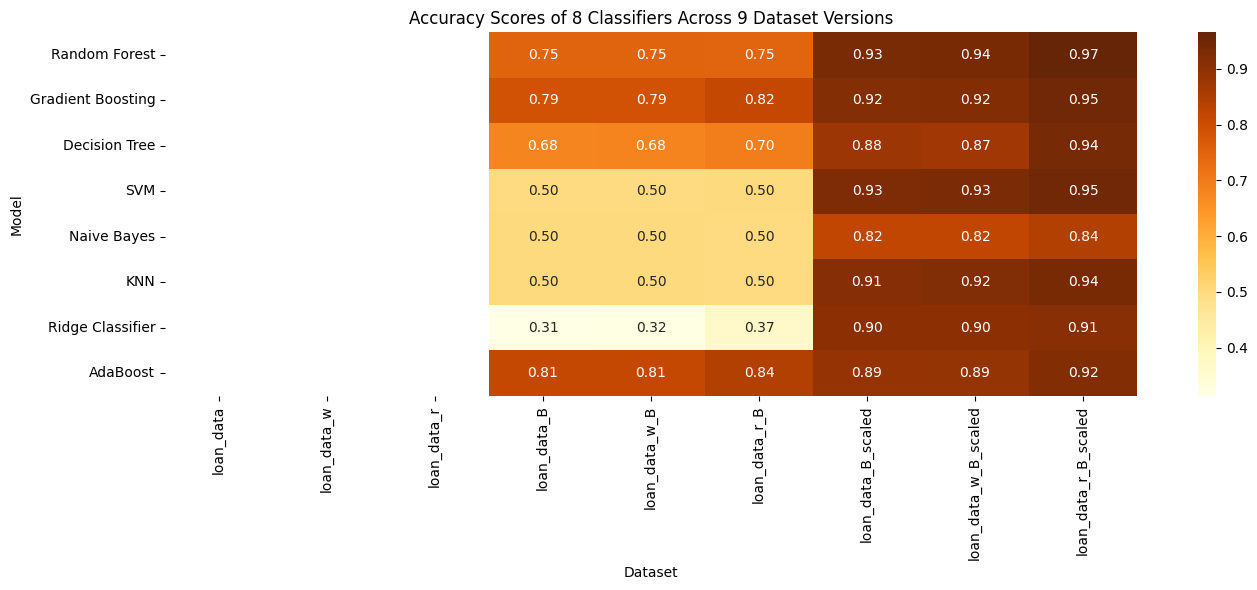

In [34]:
# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(results.astype(float), annot=True, fmt=".2f", cmap="YlOrBr")
plt.title("Accuracy Scores of 8 Classifiers Across 9 Dataset Versions")
plt.ylabel("Model")
plt.xlabel("Dataset")
plt.tight_layout()
plt.show()

Here’s a detailed results and report analysis for the most performance model, __Random Forrest__ applied to loan_data_r_B_scaled dataframe:   
To do this, we train and test this single model and get the different performance metrics:

In [35]:
# Prepare data
X = loan_data_B_scaled.drop(columns=["loan_status", "id"], errors='ignore')
y = loan_data_B_scaled["loan_status"]

# Train-test split (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
# Predict class labels and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability for class = 1 (defaulted)

The classification report summarizes the performance of the model in terms of precision, recall, F1-score, and support. Precision measures how many of the predicted defaults were actually defaults, while recall measures how many actual defaults were correctly identified. The F1-score combines both metrics into a harmonic mean, providing a balanced view of model effectiveness when dealing with class imbalance. Support indicates the number of true observations for each class in the test set.

In [38]:
# Generate classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

              precision    recall  f1-score       support
0              0.948789  0.980052  0.964167  10076.000000
1              0.979300  0.946923  0.962839  10042.000000
accuracy       0.963515  0.963515  0.963515      0.963515
macro avg      0.964045  0.963487  0.963503  20118.000000
weighted avg   0.964019  0.963515  0.963504  20118.000000


This table summarizes the model's performance on each class (non-defaulted = 0, defaulted = 1) using key metrics: precision, recall, F1-score, and support. Here's a detailed explanation of what each row and metric represents:   
Class 0 (Non-Defaulted Loans)

    Precision: 0.949
    This means that 94.9% of the loans the model predicted as non-defaulted were actually non-defaulted. A lower precision would imply more false positives (i.e., defaulted loans being incorrectly labeled as safe).

    Recall: 0.980
    The model correctly identified 97.98% of all true non-defaulted loans. This high recall indicates very few false negatives in this class (i.e., very few actual non-defaults were misclassified as defaults).

    F1-score: 0.964
    The F1-score is the harmonic mean of precision and recall, balancing both metrics. A value of 0.964 indicates strong overall classification performance for non-defaulted loans.

    Support: 10,076
    This is the actual number of non-defaulted loans in the test dataset.

Class 1 (Defaulted Loans)

    Precision: 0.979
    Of all the loans predicted as defaulted, 97.9% were truly defaults. This high precision implies few false positives, which is crucial in high-risk contexts like credit scoring.

    Recall: 0.948
    The model correctly identified 94.76% of the actual defaulted loans. The remaining ~5.24% were false negatives (i.e., defaults misclassified as non-defaults), which is acceptable given the overall performance.

    F1-score: 0.963
    Similar to class 0, this high F1-score shows excellent balance between precision and recall for defaulted loans.

    Support: 10,042
    This is the number of actual defaulted loans in the test set. Note that the test data is class-balanced, which helps make the performance metrics easier to interpret.

Overall Metrics

    Accuracy: 0.964
    This is the overall proportion of correct predictions. 96.37% of all predictions made by the model matched the actual class labels.

    Macro Average
    These values are the unweighted average of the metrics for both classes. It gives equal weight to each class regardless of how many samples each has.

        Precision: 0.964

        Recall: 0.964

        F1-score: 0.964

    Weighted Average
    These values are the average of precision, recall, and F1-score weighted by the number of samples (support) in each class. Since the classes are nearly balanced in this case, macro and weighted averages are very similar.

<font size="6"><b>Confusion Matrix</b></font>   
The confusion matrix is a fundamental tool for evaluating the performance of classification models. It provides a detailed breakdown of prediction outcomes by comparing the predicted class labels with the actual labels from the test set. In a binary classification task like ours (predicting whether a loan is defaulted), the matrix consists of four components:

__True Positives (TP)__ are cases where the model correctly predicted a loan as defaulted, and the loan actually defaulted. These represent successful detections of high-risk borrowers.

__True Negatives (TN)__ are cases where the model correctly predicted a loan as non-defaulted, and the loan indeed did not default. These are successful identifications of safe borrowers.

__False Positives (FP)__ occur when the model incorrectly predicted that a loan would default when in fact it did not. This is a Type I error, which in financial contexts might lead to unfair rejections of creditworthy applicants.

__False Negatives (FN)__ occur when the model predicted a loan as non-defaulted, but it actually defaulted. This is a Type II error, which is particularly risky as it results in lending to individuals who ultimately default.

By visualizing the confusion matrix, we can understand not only how many total predictions were correct (accuracy), but also how the model performs across these different types of errors—especially when dealing with imbalanced data or when certain errors are more costly than others.

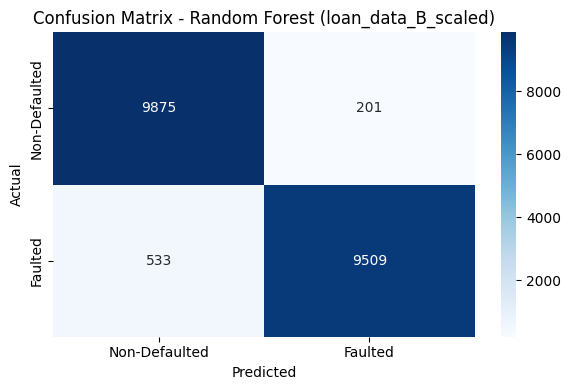

In [39]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non-Defaulted", "Faulted"],
            yticklabels=["Non-Defaulted", "Faulted"])
plt.title("Confusion Matrix - Random Forest (loan_data_B_scaled)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

<font size="6"><b>ROC Curve and AUC Score</b></font>   
The Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate (recall) against the false positive rate across different classification thresholds. The Area Under the Curve (AUC) quantifies the overall ability of the model to discriminate between the classes. An AUC of 1.0 represents perfect separation, while an AUC of 0.5 suggests the model is no better than random guessing.

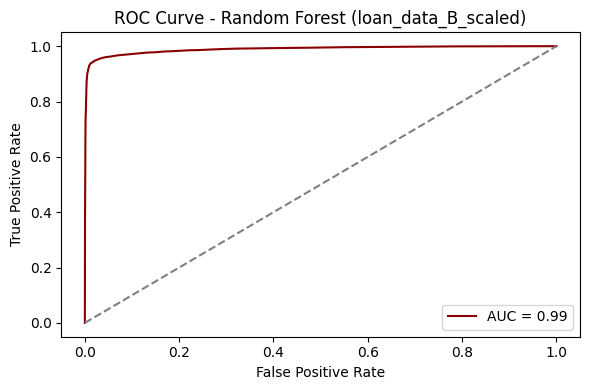

In [40]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='darkred')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("ROC Curve - Random Forest (loan_data_B_scaled)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

This ROC curve evaluates the performance of the Random Forest classifier trained on the loan_data_B_scaled dataset. The ROC (Receiver Operating Characteristic) curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds.

The red curve represents the model's ability to distinguish between defaulted and non-defaulted loans. The closer the curve hugs the top-left corner, the better the model's performance. In this case, the curve is sharply convex and closely approaches the top-left, indicating excellent discriminatory power.

The gray diagonal line represents the performance of a random classifier (AUC = 0.5). Any model performing above this line is considered better than random guessing.

The reported Area Under the Curve (AUC) is 0.99, which is nearly perfect. This means that there is a 99% probability that the model will rank a randomly chosen defaulted loan higher than a randomly chosen non-defaulted loan. Such a high AUC confirms that the model is both sensitive (high TPR) and specific (low FPR) across thresholds, making it highly effective for decision-making in risk-sensitive domains like credit scoring.

This performance aligns with the precision, recall, and F1-score results and validates that the Random Forest model is not only accurate but also robust and reliable.

<font size="6"><b>Feature Importance Analysis</b></font>   
Random Forest models offer built-in feature importance scores, which reflect how much each feature contributes to reducing classification error across all trees. By ranking the top features, we can interpret which variables are most influential in predicting loan defaults. This is especially valuable for business stakeholders or when building explainable AI models.

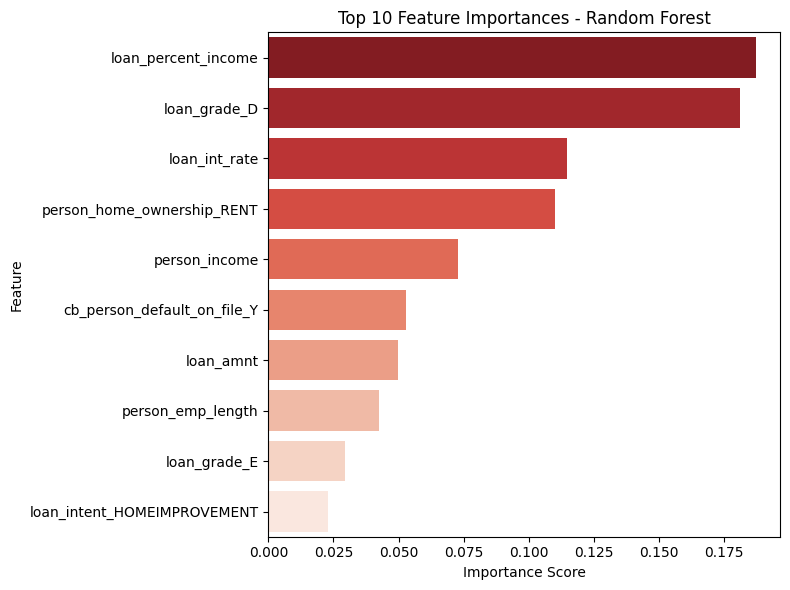

In [41]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[:10], y=importances.index[:10], palette="Reds_r")
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

This bar chart presents the top 10 most important features as determined by the Random Forest classifier trained on the loan_data_B_scaled dataset. Feature importance in Random Forest is calculated based on how much each variable contributes to reducing impurity (or error) across all the trees in the forest. The higher the importance score, the more influential the feature is in the model’s decision-making process.

At the top of the list is loan_grade_D, indicating that applicants assigned this credit grade had a disproportionately strong influence on whether the model predicted a loan would default. This suggests that this specific loan grade (D) is highly associated with default behavior in the dataset.

loan_percent_income follows closely, representing the proportion of the borrower's income that the loan amount constitutes. A higher ratio indicates greater financial strain and a higher risk of default, making this variable both intuitive and critical for prediction.

Next is person_home_ownership_RENT, meaning the model has learned that renters, compared to other homeownership categories (like owners or those with mortgages), have a higher likelihood of defaulting. This aligns with broader financial risk indicators, where home ownership is often correlated with financial stability.

loan_int_rate and person_income are also strongly predictive, reinforcing the earlier statistical and ROC findings that interest rate and income levels are significant predictors of default behavior. Notably, loan_int_rate is often a proxy for creditworthiness, while income represents repayment capacity.

Further down the list, features like cb_person_default_on_file_Y (indicating a previous default on record), loan_amnt, and person_emp_length continue to support the model with meaningful—but relatively lesser—predictive contributions.

The presence of other specific loan grades like loan_grade_E and loan purpose categories such as loan_intent_HOMEIMPROVEMENT suggest that certain combinations of risk signals can be associated with different default profiles.

Overall, this feature importance plot provides both validation of domain expectations and actionable insights, confirming that the model bases its predictions on credible and interpretable financial signals. This makes the Random Forest not only accurate but also explainable, which is crucial for applications in credit risk and regulatory environments.

***
___As the final conclusion this classification report confirms that the Random Forest model performs exceptionally well across both classes, with near-perfect precision and recall. The model not only predicts defaults with high confidence but also avoids misclassifying safe borrowers as risky. Such performance is particularly valuable in financial applications where both types of errors—approving risky loans and rejecting good borrowers—have significant consequences.___
***

***
***
<font size="6"><b>Kaggle Competition Try Out</b></font>   
<font size="4"><b>Loan Approval Prediction: https://www.kaggle.com/competitions/playground-series-s4e10/overview</b></font>  
***
***

In [42]:
loan_data_r_B_scaled.head()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,loan_status
0,-1.723176,2.986010,-0.850658,-1.288758,-0.585199,-0.098010,-0.061192,3.414820,False,False,...,False,False,True,False,False,False,False,False,False,0
1,-1.723117,-1.076402,0.109015,0.649700,-1.013988,0.501301,-1.161965,-1.032640,False,True,...,False,False,False,True,False,False,False,False,False,0
2,-1.723058,0.819391,-1.133990,1.295853,-0.585199,-0.932535,0.379118,1.932333,False,True,...,True,False,False,False,False,False,False,False,False,0
3,-1.722999,1.090218,0.748796,3.234311,0.701169,-0.220450,-0.061192,0.079225,False,False,...,False,True,True,False,False,False,False,False,False,0
4,-1.722939,-1.076402,0.291809,-0.642606,-0.585199,-1.570511,-0.831733,-0.662018,False,False,...,False,False,False,False,False,False,False,False,False,0


In [64]:
loan_kaggle_test = pd.read_csv("data/loan_approval_prediction_test.csv")
loan_kaggle_test.head()
loan_kaggle_test.shape

(39098, 12)

In [66]:
# Save ID and index
test_ids = loan_kaggle_test["id"]
original_index = loan_kaggle_test.index

# Standardize numerical features except ID
loan_kaggle_test_scaled = standardize_dataset_test(loan_kaggle_test)

# Ensure dummy encoding without dropping rows
loan_kaggle_test_scaled = pd.get_dummies(loan_kaggle_test_scaled, dummy_na=False)

# Restore index
loan_kaggle_test_scaled.index = original_index

# Align with training features without affecting rows
training_features = loan_data_r_B_scaled.drop(columns=["loan_status"]).columns
loan_kaggle_test_aligned = loan_kaggle_test_scaled.reindex(columns=training_features, fill_value=0)

# Final check
print("Aligned test shape:", loan_kaggle_test_aligned.shape)
print("Should be:", loan_kaggle_test.shape)

Aligned test shape: (39098, 23)
Should be: (39098, 12)


In [67]:
loan_kaggle_test_aligned

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,58645,-0.757007,0.130141,-0.436121,2.824250,1.688238,2.187295,-0.940719,False,False,...,False,False,False,False,False,False,False,True,False,False
1,58646,-0.259715,0.841503,0.339404,0.134238,0.668431,-0.650135,-0.449573,False,False,...,False,True,False,False,True,False,False,False,False,True
2,58647,-0.259715,-0.897382,0.080895,-0.941767,2.161719,-0.322739,-0.940719,False,False,...,False,False,True,False,False,False,True,False,False,True
3,58648,0.900631,-0.370447,-0.177613,-0.403765,-0.583149,-0.213607,0.287147,False,False,...,False,False,False,False,False,False,False,False,False,False
4,58649,-0.259715,0.999584,0.856421,1.030908,1.873657,-0.104475,-0.449573,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,-0.922770,-0.865766,-0.694630,-1.121101,-0.096423,-0.650135,-0.449573,False,False,...,False,False,False,True,False,False,False,False,False,False
39094,97739,-0.922770,-0.423141,0.339404,-0.403765,-1.533423,-0.104475,-0.695146,False,False,...,False,False,False,False,False,False,False,False,False,False
39095,97740,3.884377,-0.106980,-1.211647,1.030908,-1.043386,0.986844,4.707466,False,False,...,False,True,False,False,False,False,False,False,False,False
39096,97741,-0.922770,-0.739302,-0.177613,0.851574,1.641883,2.514691,-0.449573,False,False,...,False,True,False,False,False,True,False,False,False,True


In [68]:
X_kaggle = loan_kaggle_test_aligned.drop(columns=["id"], errors='ignore')

# Step 2: Predict using the trained model
y_pred = model.predict(X_kaggle)

# Step 3: Prepare submission DataFrame
submission = pd.DataFrame({
    "id": test_ids,
    "loan_status": y_pred.astype(int)
})

# Step 4: Save to CSV
submission.to_csv("kaggle_submission.csv", index=False)

# Preview the first few results
print(submission.head())

      id  loan_status
0  58645            1
1  58646            0
2  58647            1
3  58648            0
4  58649            0
